## Medical Fraud Detection

## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted',font_scale=1)
import plotly.express as px
import plotly.graph_objects as go
from warnings import filterwarnings
filterwarnings('ignore')

In [187]:

train_provider = pd.read_csv('./Data/Train-1542865627584.csv')
train_beneficiary = pd.read_csv('./Data/Train_Beneficiarydata-1542865627584.csv')
train_inpatient = pd.read_csv('./Data/Train_Inpatientdata-1542865627584.csv')
train_outpatient = pd.read_csv('./Data/Train_Outpatientdata-1542865627584.csv')

test_provider = pd.read_csv('./Data/Test-1542969243754.csv')
test_beneficiary = pd.read_csv('./Data/Test_Beneficiarydata-1542969243754.csv')
test_inpatient = pd.read_csv('./Data/Test_Inpatientdata-1542969243754.csv')
test_outpatient = pd.read_csv('./Data/Test_Outpatientdata-1542969243754.csv')


### Exploring Provider Data

Here, Train provider Dataset got class label describing whether the provider is fraud or not where as test data only contains the unique identifier for a Provider and not a class label as the class label has to be found out.

In [188]:
train_provider

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [189]:
train_provider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [190]:
train_provider.describe()

,Provider,PotentialFraud
count,5410,5410
unique,5410,2
top,PRV51001,No
freq,1,4904


In [191]:
train_provider['PotentialFraud'].value_counts(normalize=True)

No     0.90647
Yes    0.09353
Name: PotentialFraud, dtype: float64

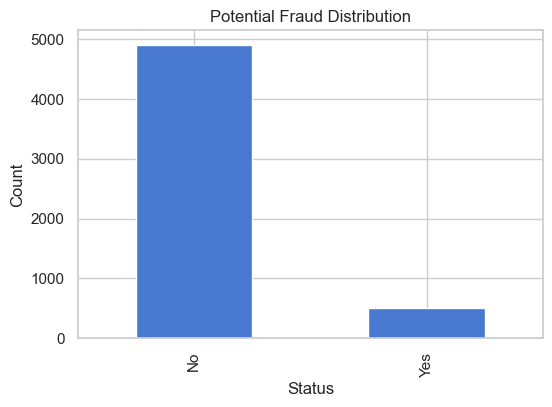

In [192]:
plt.title("Potential Fraud Distribution")
train_provider.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (6,4))
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

### Exploring Benificiary Data:

In [193]:
train_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [194]:
train_beneficiary.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,...,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,...,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,...,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [195]:
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 10):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()

In [196]:
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 10 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()


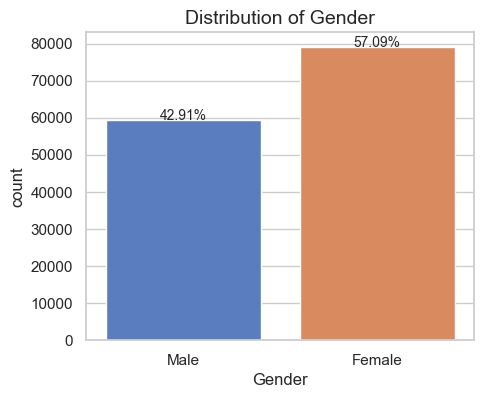

In [197]:
plt.figure(figsize=(5,4))
gender = train_beneficiary['Gender'].apply(lambda val: 'Male' if val ==1 else 'Female')
plt.title('Distribution of Gender', fontsize=14)
ax = sns.countplot(x = gender)
percentage_without_hue(ax, train_beneficiary['Gender'])

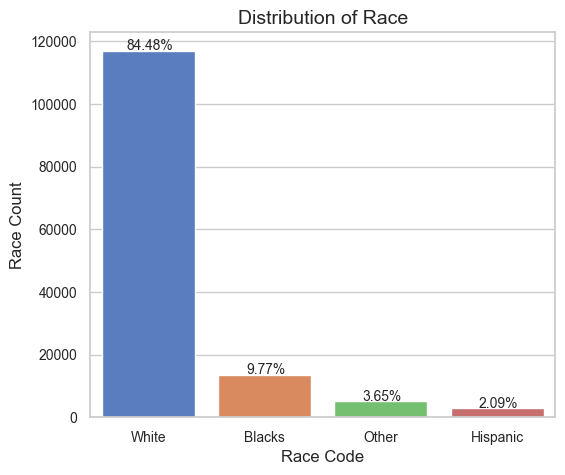

In [198]:
# Race code 1: White, 2: Black, 3: Other, 5: Hispaic
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Race', data=train_beneficiary, orient ="v", order = train_beneficiary['Race'].value_counts().index)
plt.title('Distribution of Race', fontsize=14)
plt.xticks(labels = ['White','Blacks','Other','Hispanic'],ticks=[0,1,2,3],size = 10)
plt.yticks(size = 10)
plt.xlabel('Race Code', size = 12)
plt.ylabel('Race Count', size = 12)
percentage_without_hue(ax, train_beneficiary['Race'], 0.01, 200, 10)

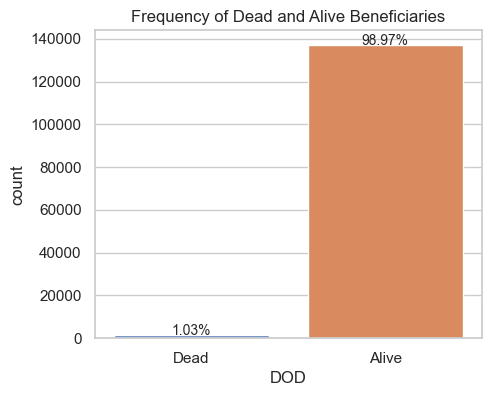

In [199]:
# Alive or dead
plt.figure(figsize=(5, 4))
dead_alive = train_beneficiary['DOD'].apply(lambda val: 1 if val!=val else 0)
ax = sns.countplot(x = dead_alive)
plt.xticks(labels = ['Dead', 'Alive'], ticks=[0,1])
plt.title('Frequency of Dead and Alive Beneficiaries')
percentage_without_hue(ax, train_beneficiary['DOD'],0,20,10)

In [200]:
Beneficiary = train_beneficiary

# Convert Date of Birth and Date of Death from String to Datetime format
Beneficiary['DOB'] = pd.to_datetime(train_beneficiary['DOB'] , format = '%Y-%m-%d')
Beneficiary['DOD'] = pd.to_datetime(train_beneficiary['DOD'],format = '%Y-%m-%d')

test_beneficiary['DOB'] = pd.to_datetime(test_beneficiary['DOB'] , format = '%Y-%m-%d')
test_beneficiary['DOD'] = pd.to_datetime(test_beneficiary['DOD'],format = '%Y-%m-%d')

In [201]:
Beneficiary['Patient_Age'] = round(((Beneficiary['DOD'] - Beneficiary['DOB']).dt.days)/365)
Beneficiary['Patient_Age'].fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-Beneficiary['DOB']).dt.days)/365),inplace=True)

test_beneficiary['Patient_Age'] = round(((test_beneficiary['DOD'] - test_beneficiary['DOB']).dt.days)/365)
test_beneficiary['Patient_Age'].fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d') - test_beneficiary['DOB']).dt.days)/365),inplace=True)

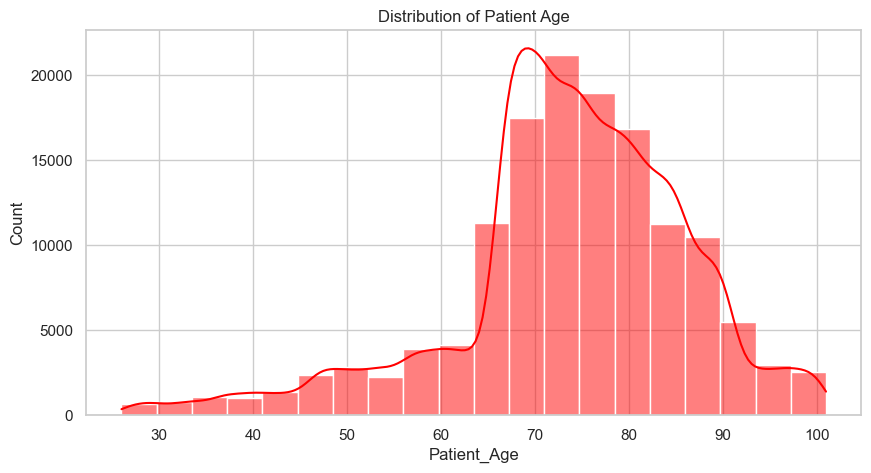

In [202]:
# Plot distribution of age
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Beneficiary['Patient_Age'], kde = True, color ='red', bins = 20)
plt.title('Distribution of Patient Age')
plt.show()

Medicare is for patients above 65, or some deisabled patients below 65.

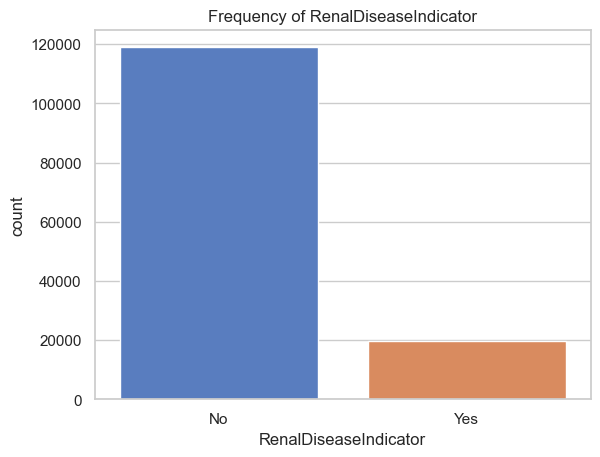

In [203]:
# has Renal Disease or not
renal_disease = train_beneficiary['RenalDiseaseIndicator'].apply(lambda val: 'No' if val=='0' else 'Yes')
sns.countplot(x = renal_disease)
plt.title('Frequency of RenalDiseaseIndicator')
percentage_without_hue(ax, train_beneficiary['RenalDiseaseIndicator'])

In [204]:
def annotate(fig):
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{round(height,0)}', (x + width/2, y + height*1.015), ha='center', fontsize=8, rotation=0)

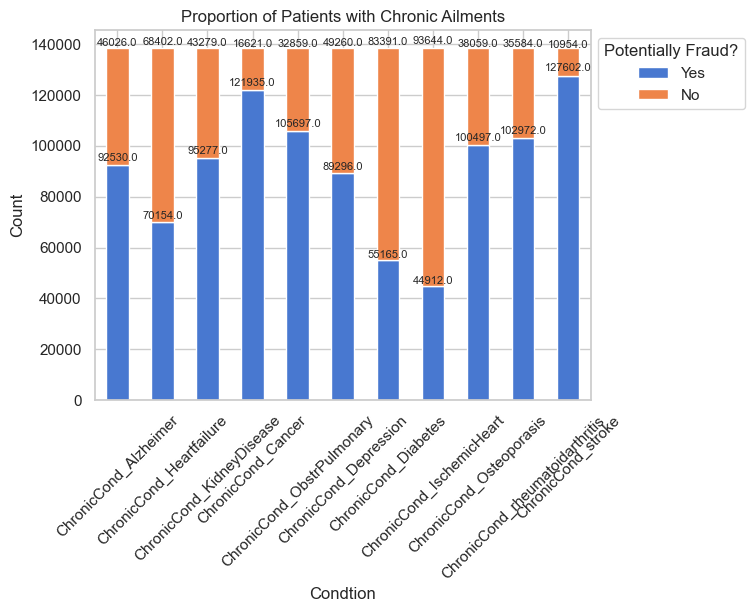

In [205]:
# train_beneficiary['ChronicCond_Depression'].value_counts()
temp = pd.DataFrame()
ind = []
for i in range(10, 21):
    col = train_beneficiary[train_beneficiary.columns[i]].value_counts().transpose()
    temp = pd.concat([temp, pd.DataFrame({'Count': col}).transpose()])
    ind.append(col.name)

temp.index = ind
temp

fig = temp.plot(kind = 'bar', stacked=True, legend=False)
annotate(fig)

plt.xlabel('Condtion')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title('Proportion of Patients with Chronic Ailments')
plt.legend(['Yes', 'No'], bbox_to_anchor =(1, 1), title='Potentially Fraud?')
plt.savefig('./PropAilments.png')
plt.show()

In [206]:
# Patient Risk Score
# Replacing 2 with 0 for chronic conditions, Zero indicates chronic condition is No
Beneficiary = train_beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)
# For RenalDiseaseIndicator replacing 'Y' with 1
Beneficiary = Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

# convert all these columns datatypes to numeric
Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

# calculate patient risk score by summing up all the chronic conditions.
# The higher risk score indicates the health of the patient is not good
Beneficiary['Patient_Risk_Score'] = Beneficiary['ChronicCond_Alzheimer'] + Beneficiary['ChronicCond_Heartfailure'] + \
                                        Beneficiary['ChronicCond_KidneyDisease'] + Beneficiary['ChronicCond_Cancer'] +\
                                        Beneficiary['ChronicCond_ObstrPulmonary'] + Beneficiary['ChronicCond_Depression'] +\
                                    Beneficiary['ChronicCond_Diabetes'] + Beneficiary['ChronicCond_IschemicHeart'] +\
                                    Beneficiary['ChronicCond_Osteoporasis'] + Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    Beneficiary['ChronicCond_stroke'] + Beneficiary['RenalDiseaseIndicator']


train_beneficiary['Patient_Risk_Score'] = Beneficiary['Patient_Risk_Score']


In [207]:
test_beneficiary = test_beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)
# For RenalDiseaseIndicator replacing 'Y' with 1
test_beneficiary = test_beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

# convert all these columns datatypes to numeric
test_beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = test_beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

# calculate patient risk score by summing up all the chronic conditions.
# The higher risk score indicates the health of the patient is not good
test_beneficiary['Patient_Risk_Score'] = test_beneficiary['ChronicCond_Alzheimer'] + test_beneficiary['ChronicCond_Heartfailure'] + \
                                        test_beneficiary['ChronicCond_KidneyDisease'] + test_beneficiary['ChronicCond_Cancer'] +\
                                        test_beneficiary['ChronicCond_ObstrPulmonary'] + test_beneficiary['ChronicCond_Depression'] +\
                                    test_beneficiary['ChronicCond_Diabetes'] + test_beneficiary['ChronicCond_IschemicHeart'] +\
                                    test_beneficiary['ChronicCond_Osteoporasis'] + test_beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    test_beneficiary['ChronicCond_stroke'] + Beneficiary['RenalDiseaseIndicator']

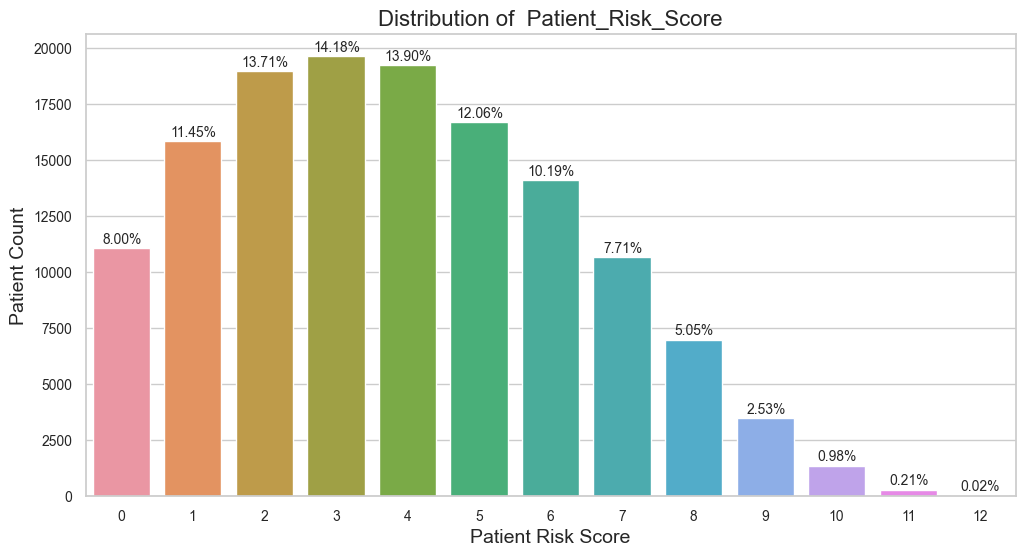

In [208]:
# Distribition of patient risk score
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Patient_Risk_Score',y=None, data=Beneficiary, orient ="v")
plt.title('Distribution of  Patient_Risk_Score', fontsize=16)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Patient Risk Score', size = 14)
plt.ylabel('Patient Count', size = 14)
percentage_without_hue(ax, Beneficiary['Patient_Risk_Score'], 0.01, 200,10)
# normal distribution of patient risk score.
# Most of the patients with risk score 2, 3, 4, 5. Very few patients are there with risk score 9, 10, 11, 12

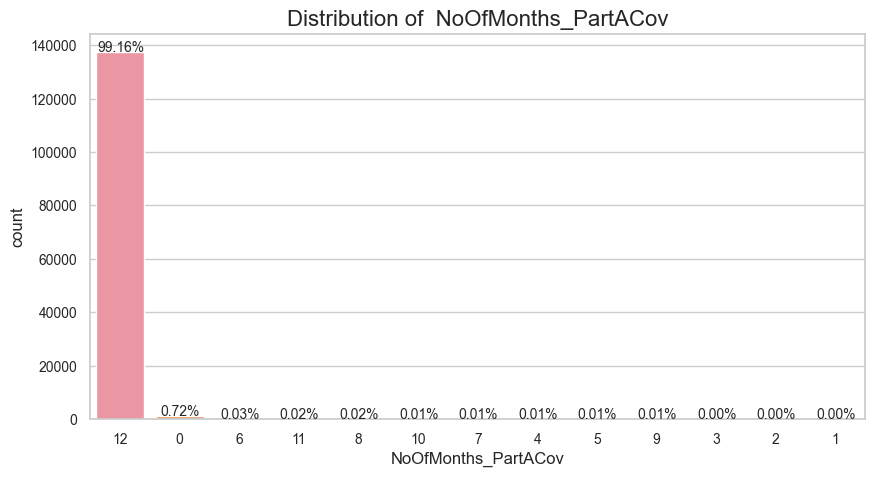

In [209]:
# Distribution of NoOfMonths_PartACov
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartACov',y=None, data=Beneficiary, orient ="v", order = Beneficiary['NoOfMonths_PartACov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartACov', fontsize=16)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 14)
# plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, Beneficiary['Race'], 0.01, 200, 10)

99% of beneficiaries are covered for Part A for a year

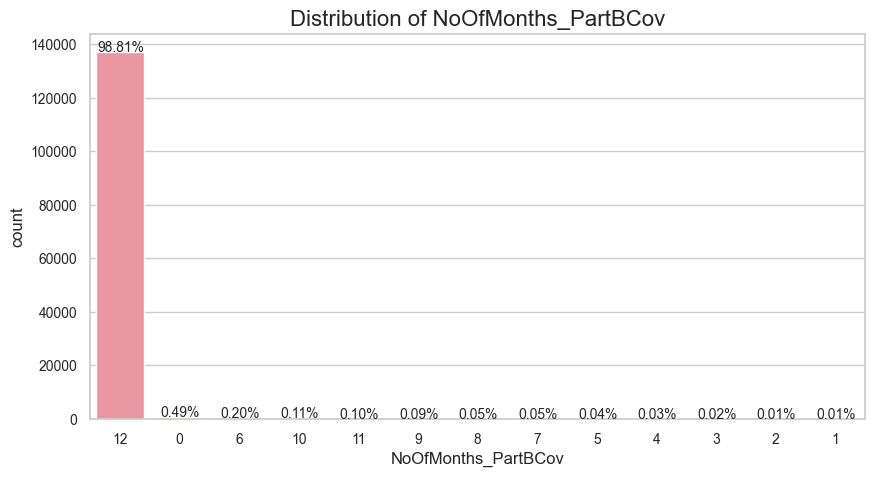

In [210]:
# Distribution of NoOfMonths_PartBCov
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartBCov',y=None, data=Beneficiary, orient ="v", order = Beneficiary['NoOfMonths_PartBCov'].value_counts().index)
plt.title('Distribution of NoOfMonths_PartBCov', fontsize=16)
plt.xticks(size = 10)
plt.yticks(size = 10)
percentage_without_hue(ax, Beneficiary['Race'], 0.01, 200, 10)

98.81% of beneficiaries are covered for Part B for a year

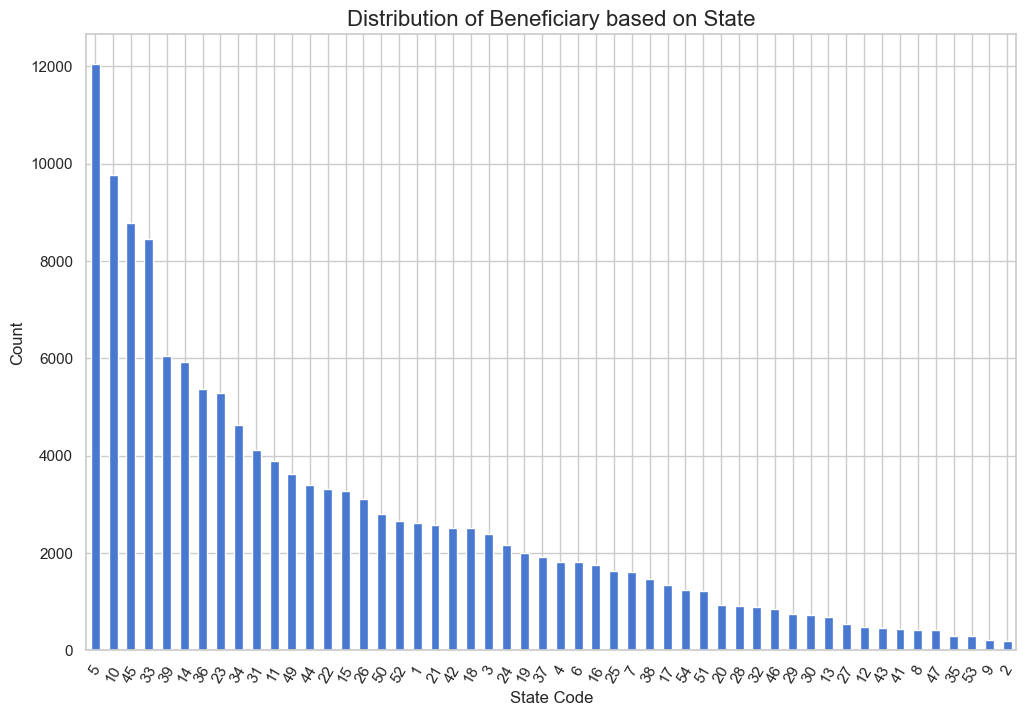

In [211]:
# Distribution of beneficiary based on State
plt.figure(figsize=(12,8))
train_beneficiary['State'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('State Code')
plt.ylabel('Count')
plt.title('Distribution of Beneficiary based on State', fontsize=16)
plt.xticks(rotation=60)
plt.show()

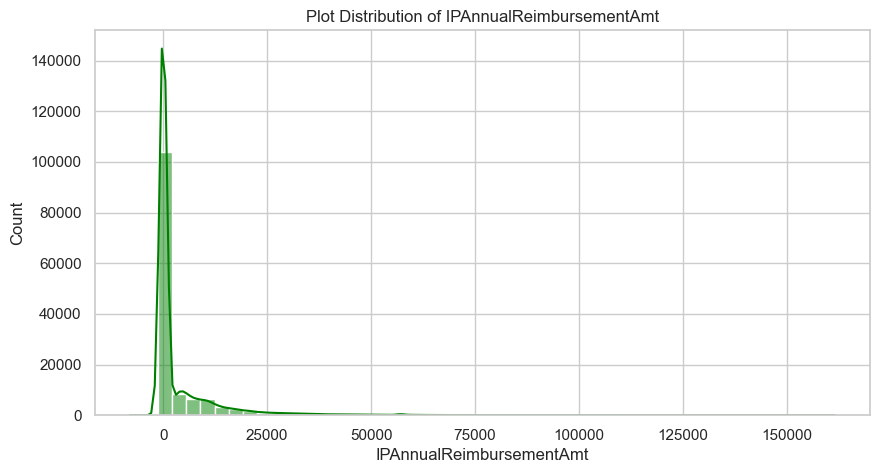

In [212]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Beneficiary['IPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)
plt.title('Plot Distribution of IPAnnualReimbursementAmt')
plt.show()

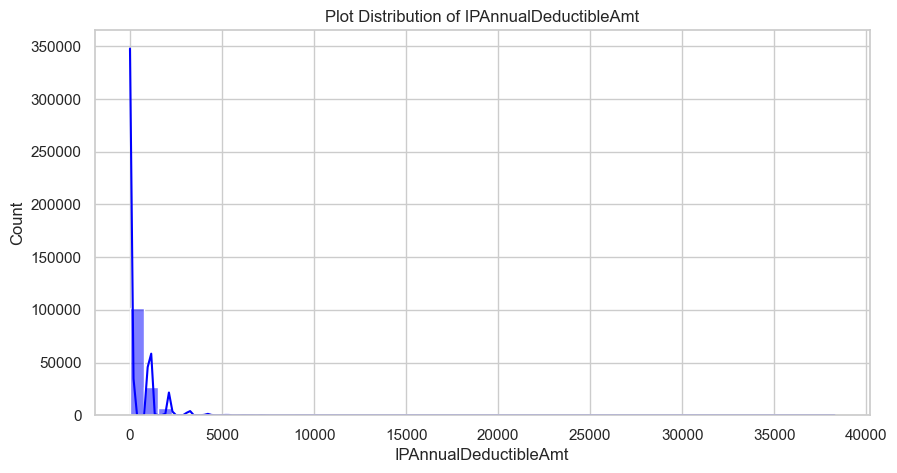

In [213]:
# Plot distribution of IPAnnualDeductibleAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Beneficiary['IPAnnualDeductibleAmt'], kde = True, color ='blue', bins = 50)
plt.title('Plot Distribution of IPAnnualDeductibleAmt')
plt.show()

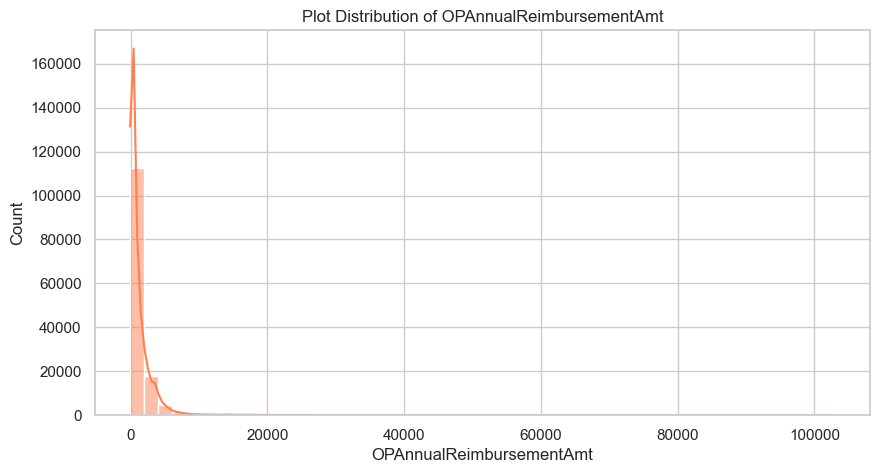

In [214]:
# Plot distribution of OPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Beneficiary['OPAnnualReimbursementAmt'], kde = True, color ='coral', bins = 50)
plt.title('Plot Distribution of OPAnnualReimbursementAmt')
plt.show()

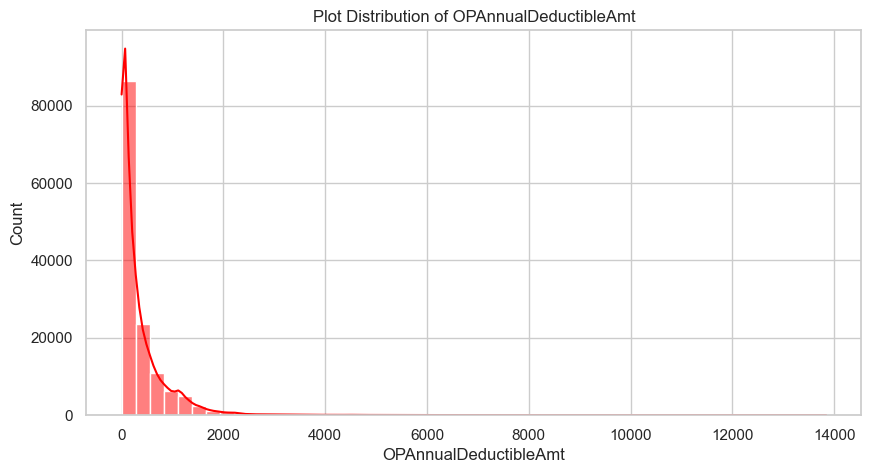

In [215]:
# Plot distribution of OPAnnualDeductibleAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Beneficiary['OPAnnualDeductibleAmt'], kde = True, color ='red', bins = 50)
plt.title('Plot Distribution of OPAnnualDeductibleAmt')

plt.show()

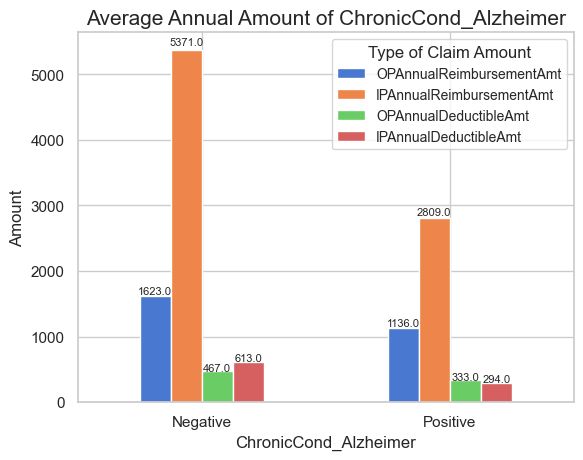

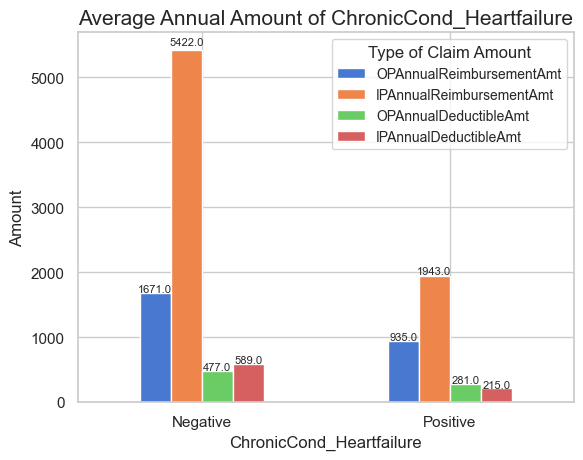

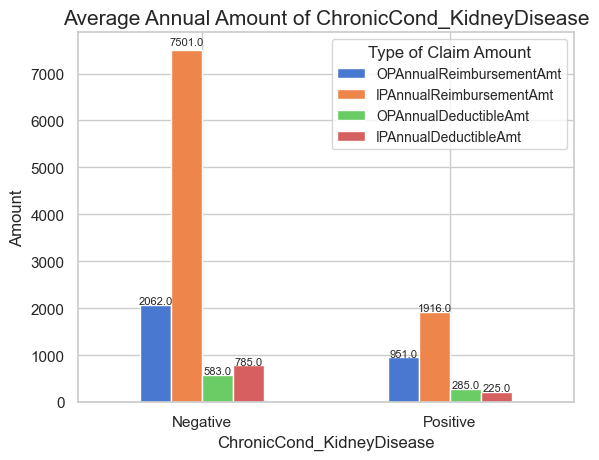

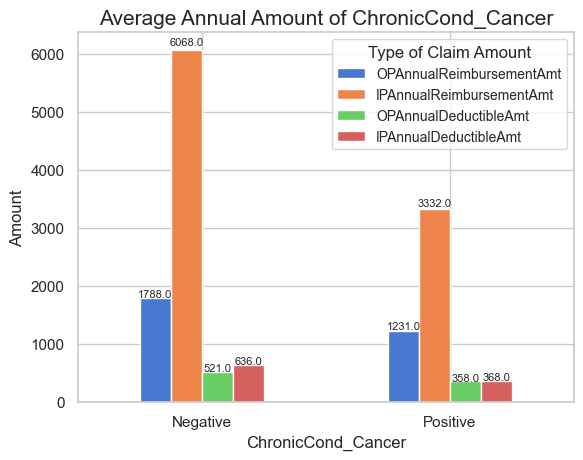

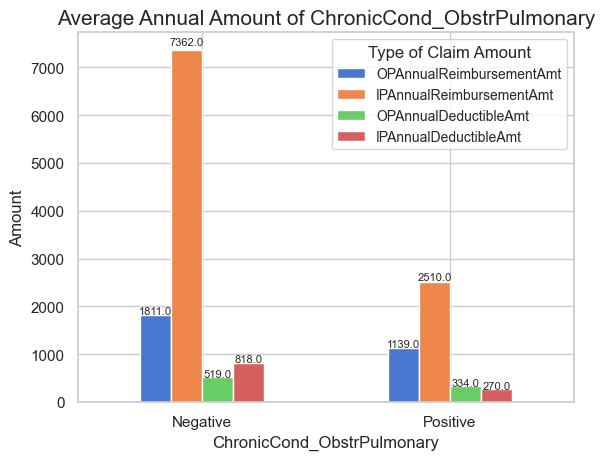

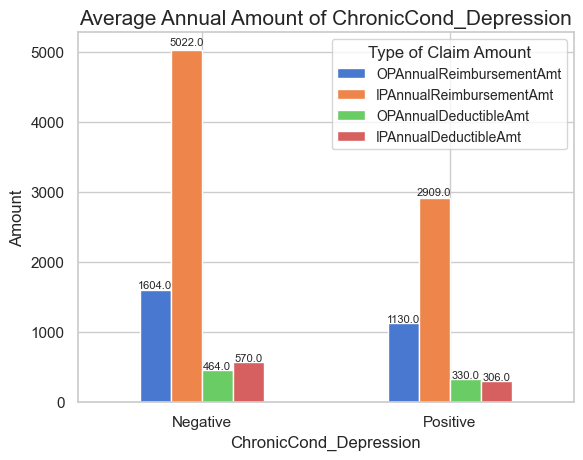

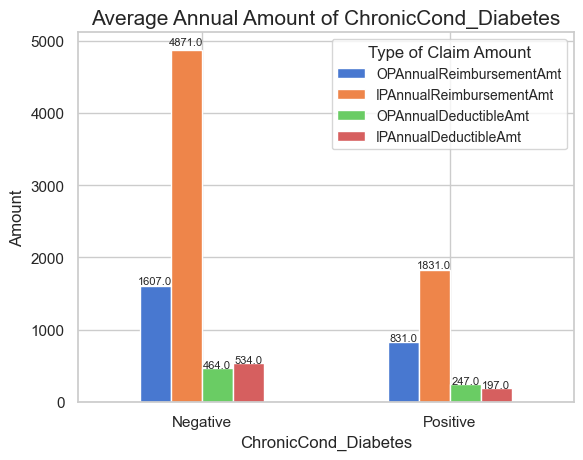

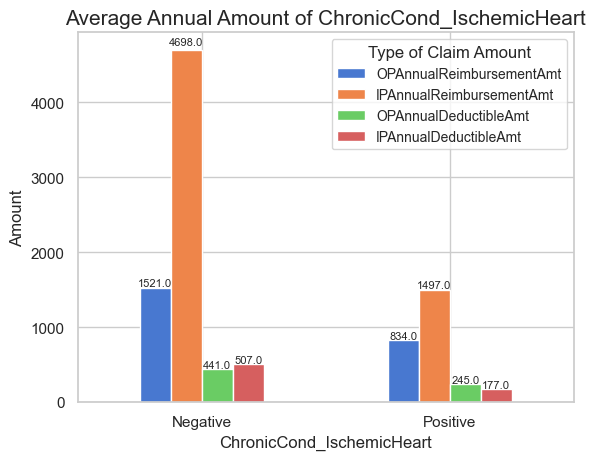

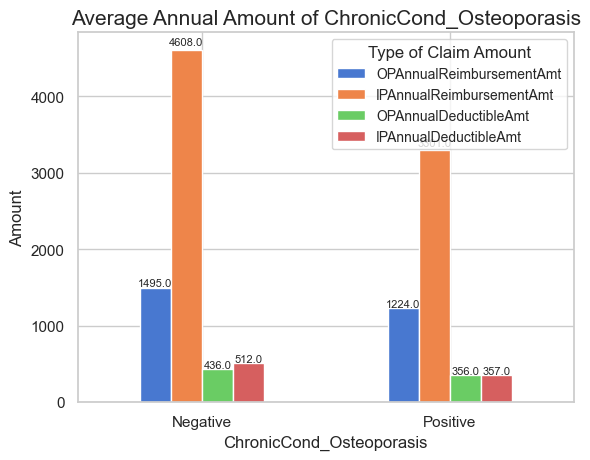

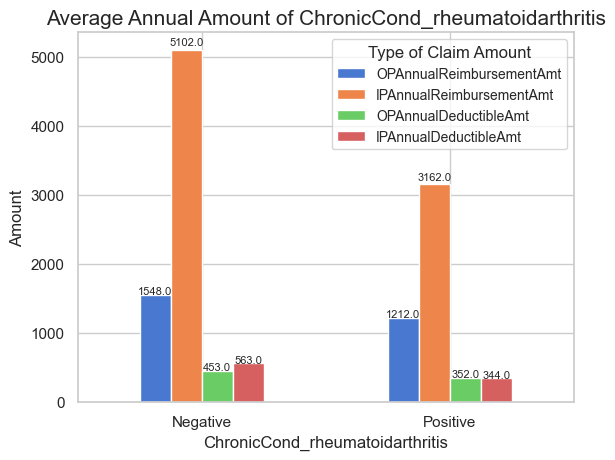

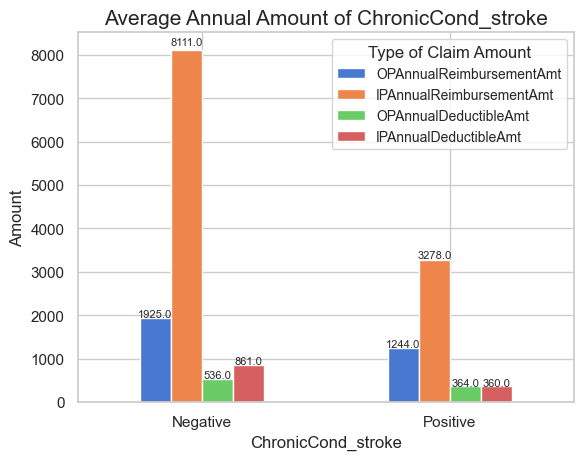

In [216]:
# train_beneficiary['ChronicCond_Depression'].value_counts()

temp = []
ind = []
for i in range(10, 21):
    cond = train_beneficiary.columns[i]

    amt = train_beneficiary.iloc[:, [i, 21,22,23,24]].groupby(by = cond) \
    .agg({'OPAnnualReimbursementAmt': 'mean', 'IPAnnualReimbursementAmt': 'mean', \
        'OPAnnualDeductibleAmt': 'mean', 'IPAnnualDeductibleAmt': 'mean'})

    temp.append(amt)
    fig = amt.plot(kind='bar')
    annotate(fig)
    plt.ylabel('Amount')
    plt.title(f'Average Annual Amount of {cond}', fontsize=15)
    plt.legend(title = 'Type of Claim Amount', fontsize=10)
    plt.xticks(rotation=0, ticks=[1,0], labels=['Positive', 'Negative'])
    print('\n')
    # plt.savefig(f'./{cond}.png')
    plt.show()

### Exploring IN-PATIENTS DATA

In [217]:
train_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [218]:
train_inpatient['ClaimStartDt'] = pd.to_datetime(train_inpatient['ClaimStartDt'],format='%Y-%m-%d')
train_inpatient['ClaimEndDt'] = pd.to_datetime(train_inpatient['ClaimEndDt'],format='%Y-%m-%d')

test_inpatient['ClaimStartDt'] = pd.to_datetime(test_inpatient['ClaimStartDt'],format='%Y-%m-%d')
test_inpatient['ClaimEndDt'] = pd.to_datetime(test_inpatient['ClaimEndDt'],format='%Y-%m-%d')

In [219]:
claim_duration_train = (train_inpatient['ClaimEndDt']  - train_inpatient['ClaimStartDt'] ).dt.days
train_inpatient['claim_duration'] = claim_duration_train

claim_duration_test = (test_inpatient['ClaimEndDt']  - test_inpatient['ClaimStartDt'] ).dt.days
test_inpatient['claim_duration'] = claim_duration_test

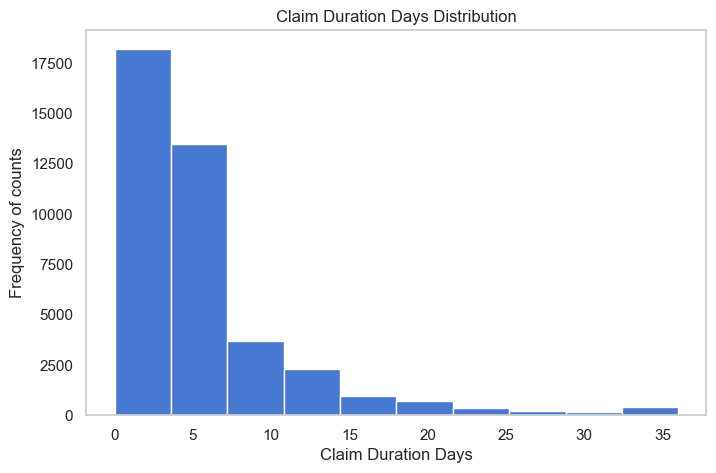

In [220]:
plt.figure(figsize = (8,5))
claim_duration_train.plot(kind = 'hist')
plt.xlabel('Claim Duration Days')
plt.ylabel('Frequency of counts')
plt.title('Claim Duration Days Distribution')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.grid()

In [221]:
train_inpatient['AdmissionDt'] = pd.to_datetime(train_inpatient['AdmissionDt'],format='%Y-%m-%d')
train_inpatient['DischargeDt'] = pd.to_datetime(train_inpatient['DischargeDt'],format='%Y-%m-%d')

test_inpatient['AdmissionDt'] = pd.to_datetime(test_inpatient['AdmissionDt'],format='%Y-%m-%d')
test_inpatient['DischargeDt'] = pd.to_datetime(test_inpatient['DischargeDt'],format='%Y-%m-%d')

In [222]:
admitted_days_train = (train_inpatient['DischargeDt'] - train_inpatient['AdmissionDt']).dt.days
train_inpatient['admitted_days'] =  admitted_days_train

admitted_days_test = (test_inpatient['DischargeDt'] - test_inpatient['AdmissionDt']).dt.days
test_inpatient['admitted_days'] =  admitted_days_test

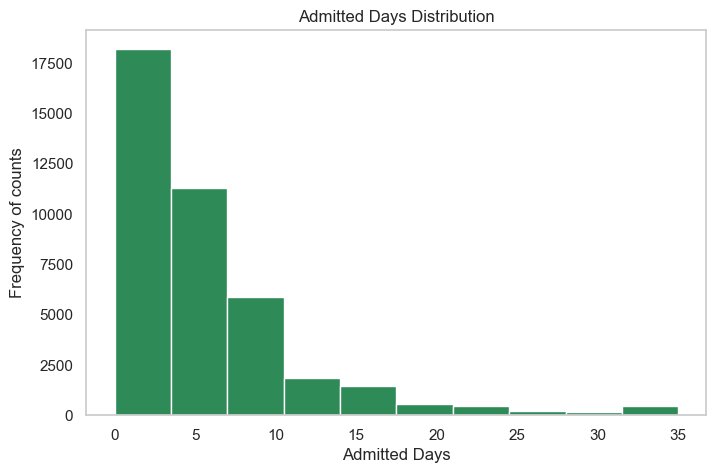

In [223]:
plt.figure(figsize = (8,5))
admitted_days_train.plot(kind = 'hist', color='seagreen')
plt.xlabel('Admitted Days')
plt.ylabel('Frequency of counts')
plt.title('Admitted Days Distribution')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.grid()

In [224]:
unq_claim_duration_days = train_inpatient['admitted_days'].unique()
tot_claims_filed_for_specific_days = pd.DataFrame(train_inpatient.groupby(['admitted_days'])['BeneID'].count())

tot_insc_amount_for_claim_durations = pd.DataFrame(train_inpatient.groupby(['admitted_days'])['InscClaimAmtReimbursed'].sum())

claim_clearance_amts = pd.merge(left=tot_claims_filed_for_specific_days, right=tot_insc_amount_for_claim_durations,
                                how='inner',
                                left_on=tot_claims_filed_for_specific_days.index,
                                right_on=tot_insc_amount_for_claim_durations.index)

claim_clearance_amts.columns = ['Claim_durations_in_days', 'Total_claims', 'All_Claims_Total_Amount']

claim_clearance_amts['Avg_Claim_Insc_Amount'] = np.round(claim_clearance_amts['All_Claims_Total_Amount']/claim_clearance_amts['Total_claims'],2)

In [225]:
unq_claim_duration_days_test = test_inpatient['admitted_days'].unique()
tot_claims_filed_for_specific_days_test = pd.DataFrame(test_inpatient.groupby(['admitted_days'])['BeneID'].count())

tot_insc_amount_for_claim_durations_test = pd.DataFrame(test_inpatient.groupby(['admitted_days'])['InscClaimAmtReimbursed'].sum())

claim_clearance_amts_test = pd.merge(left=tot_claims_filed_for_specific_days_test, right=tot_insc_amount_for_claim_durations_test,
                                how='inner',
                                left_on=tot_claims_filed_for_specific_days_test.index,
                                right_on=tot_insc_amount_for_claim_durations_test.index)

claim_clearance_amts_test.columns = ['Claim_durations_in_days', 'Total_claims', 'All_Claims_Total_Amount']

claim_clearance_amts_test['Avg_Claim_Insc_Amount'] = np.round(claim_clearance_amts_test['All_Claims_Total_Amount']/claim_clearance_amts_test['Total_claims'],2)

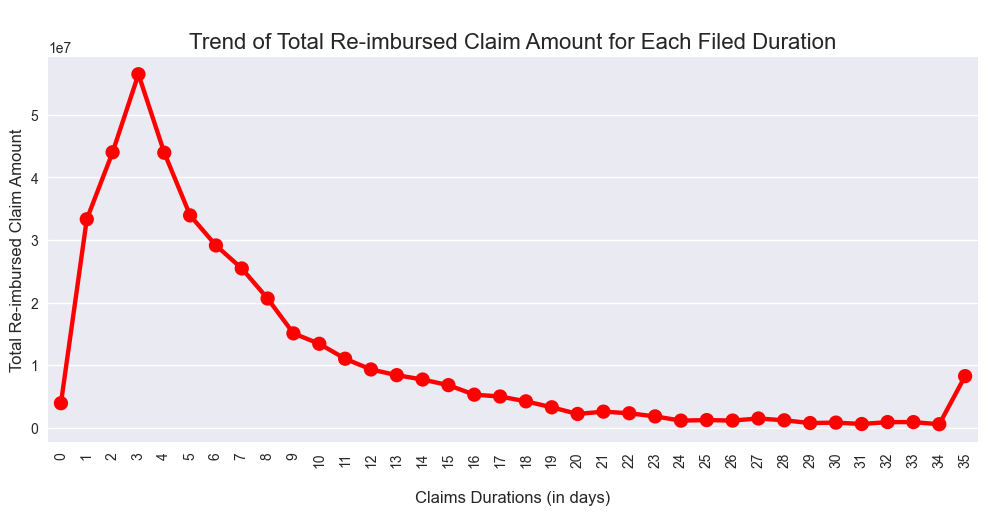

In [226]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(12,5))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='All_Claims_Total_Amount', color='red')

    plt.xticks(rotation=90)
    plt.xlabel("\nClaims Durations (in days)", fontsize=12)
    plt.ylabel("Total Re-imbursed Claim Amount", fontsize=12)
    plt.title("\nTrend of Total Re-imbursed Claim Amount for Each Filed Duration", fontsize=16)
    plt.show()

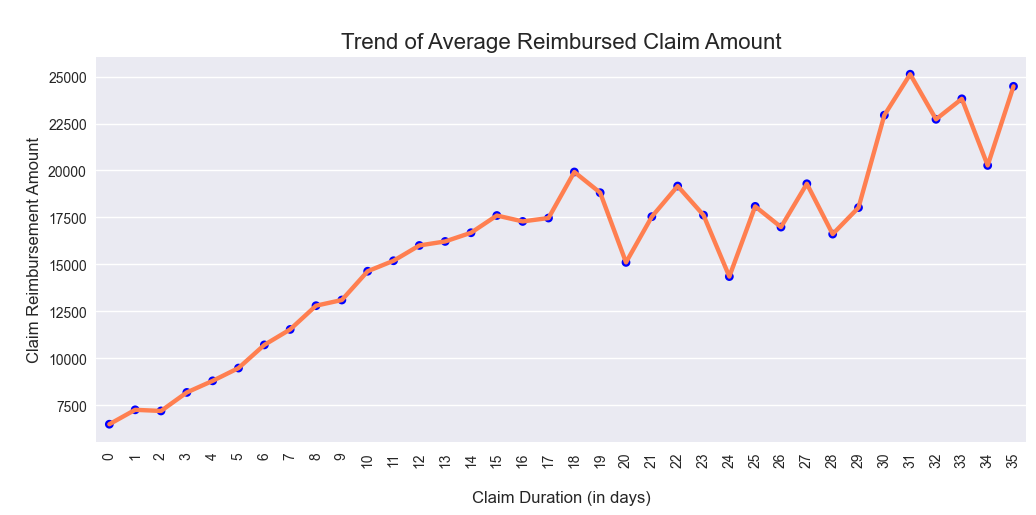

In [227]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(12,5))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount',
                  color='blue', markers=".", linestyles="")
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount',
                  color='coral', markers="", linestyles="-")
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nClaim Duration (in days)", fontsize=12)
    plt.ylabel("\nClaim Reimbursement Amount", fontsize=12)
    plt.title('\nTrend of Average Reimbursed Claim Amount', fontsize=16)
    
    plt.show()




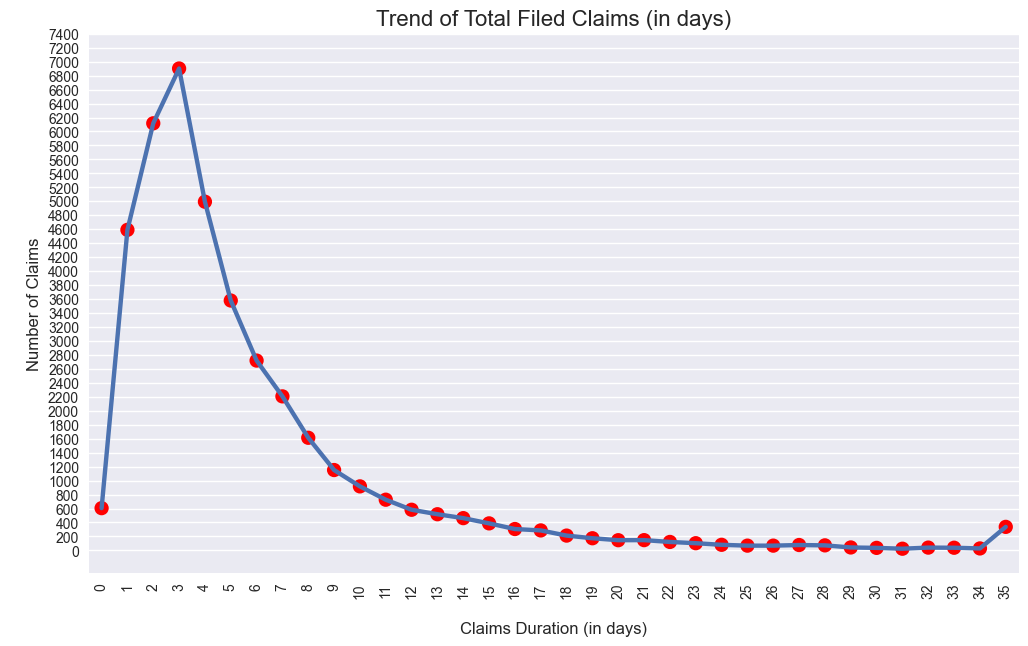

In [228]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(12,7))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Total_claims',
                   color='red', markers="o", linestyles="")
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Total_claims',
                   markers="", linestyles="-")

    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nClaims Duration (in days)", fontsize=12)
    plt.ylabel("\nNumber of Claims", fontsize=12)
    plt.yticks(np.arange(0,7500,200))
    plt.title('Trend of Total Filed Claims (in days)', fontsize=16)
    plt.show()

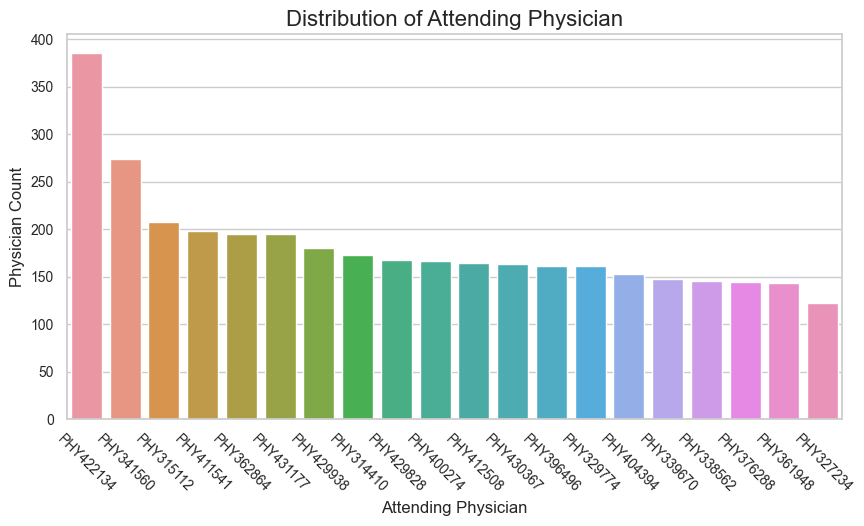

In [229]:
# Plot top 20 Attending Physician in terms of number of patients treated
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='AttendingPhysician',y=None, data=train_inpatient, orient ="v", order = train_inpatient['AttendingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of Attending Physician', fontsize=16)
plt.xlabel('Attending Physician', size = 12)
plt.ylabel('Physician Count', size = 12)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

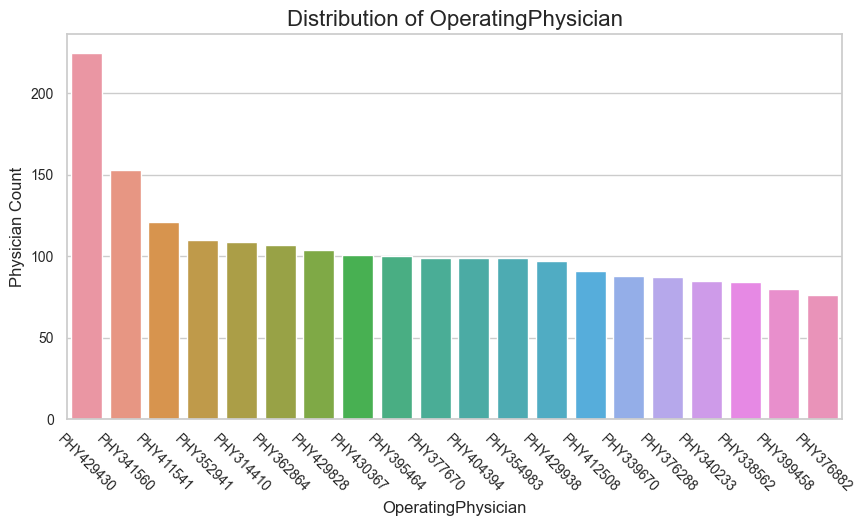

In [230]:
# Plot top 20 Operating Physician in terms of number of patients operated
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='OperatingPhysician',y=None, data=train_inpatient, orient ="v", order = train_inpatient['OperatingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of OperatingPhysician', fontsize=16)
plt.xlabel('OperatingPhysician', size = 12)
plt.ylabel('Physician Count', size = 12)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

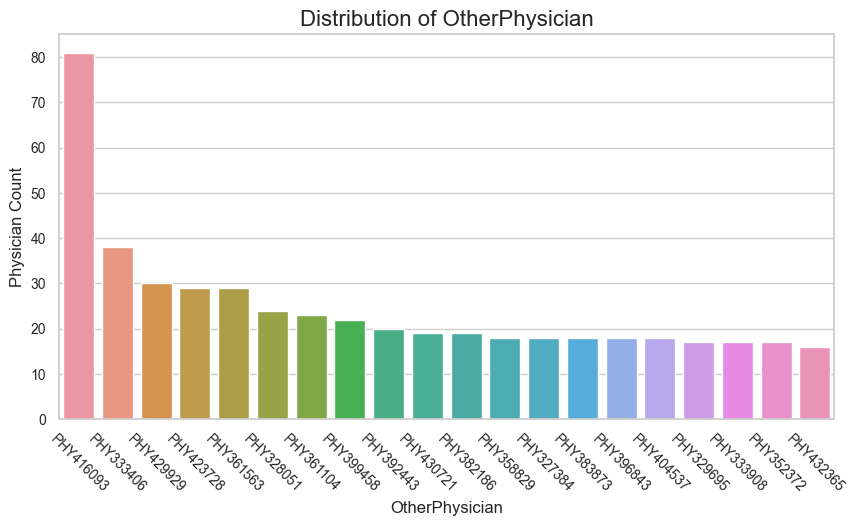

In [231]:
# Plot top 20 Other Physician in terms of number of patients treated
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='OtherPhysician',y=None, data=train_inpatient, orient ="v", order = train_inpatient['OtherPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of OtherPhysician', fontsize=16)
plt.xlabel('OtherPhysician', size = 12)
plt.ylabel('Physician Count', size = 12)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

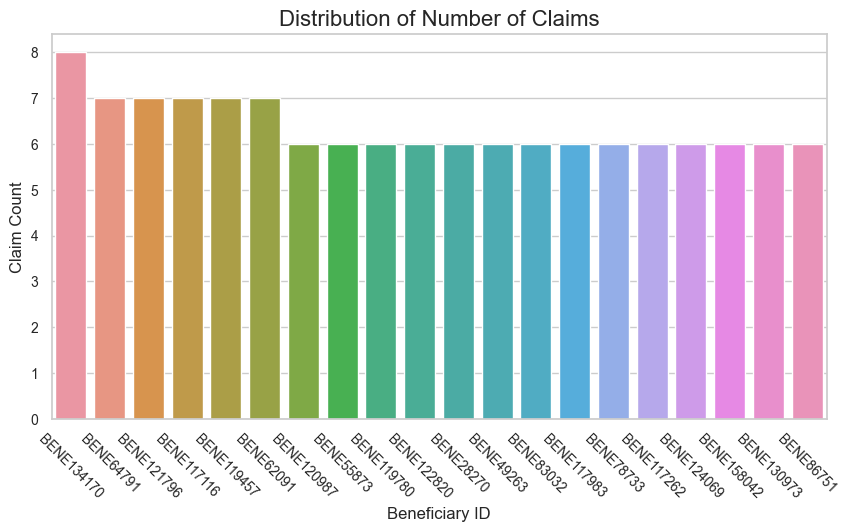

In [232]:
# Distribution of Number of Claims
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='BeneID',y=None, data=train_inpatient, orient ="v", order = train_inpatient['BeneID'].value_counts().head(20).index)
plt.title('Distribution of Number of Claims', fontsize=16)
plt.xlabel('Beneficiary ID', size = 12)
plt.ylabel('Claim Count', size = 12)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

In [233]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_IP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df['ProcedureCode'] = pd.concat([train_inpatient["ClmProcedureCode_1"],
                                   train_inpatient["ClmProcedureCode_2"],
                                   train_inpatient["ClmProcedureCode_3"],
                                   train_inpatient["ClmProcedureCode_4"],
                                   train_inpatient["ClmProcedureCode_5"],
                                   train_inpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

ClmProcedureCode_IP_test = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_test['ProcedureCode'] = pd.concat([test_inpatient["ClmProcedureCode_1"],
                                   test_inpatient["ClmProcedureCode_2"],
                                   test_inpatient["ClmProcedureCode_3"],
                                   test_inpatient["ClmProcedureCode_4"],
                                   test_inpatient["ClmProcedureCode_5"],
                                   test_inpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

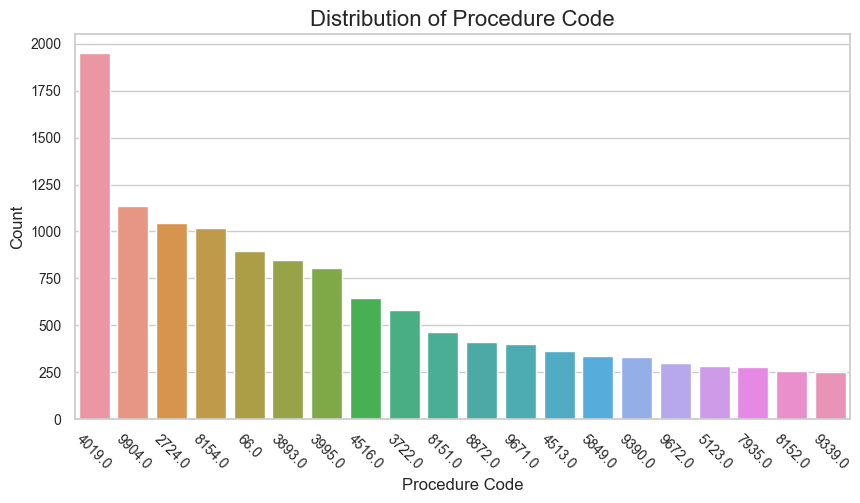

In [234]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_IP_df, orient ="v", order = ClmProcedureCode_IP_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code', fontsize=16)
plt.xlabel('Procedure Code', size = 12)
plt.ylabel('Count', size = 12)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

In [235]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_IP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_IP_df['DiagnosisCode'] = pd.concat([train_inpatient["ClmDiagnosisCode_1"],
                                           train_inpatient["ClmDiagnosisCode_2"],
                                           train_inpatient["ClmDiagnosisCode_3"],
                                           train_inpatient["ClmDiagnosisCode_4"],
                                           train_inpatient["ClmDiagnosisCode_5"],
                                           train_inpatient["ClmDiagnosisCode_6"],
                                           train_inpatient["ClmDiagnosisCode_7"],
                                           train_inpatient["ClmDiagnosisCode_8"],
                                           train_inpatient["ClmDiagnosisCode_9"],
                                           train_inpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

ClmDiagnosisCode_IP_test = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_IP_test['DiagnosisCode'] = pd.concat([test_inpatient["ClmDiagnosisCode_1"],
                                           test_inpatient["ClmDiagnosisCode_2"],
                                           test_inpatient["ClmDiagnosisCode_3"],
                                           test_inpatient["ClmDiagnosisCode_4"],
                                           test_inpatient["ClmDiagnosisCode_5"],
                                           test_inpatient["ClmDiagnosisCode_6"],
                                           test_inpatient["ClmDiagnosisCode_7"],
                                           test_inpatient["ClmDiagnosisCode_8"],
                                           test_inpatient["ClmDiagnosisCode_9"],
                                           test_inpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()


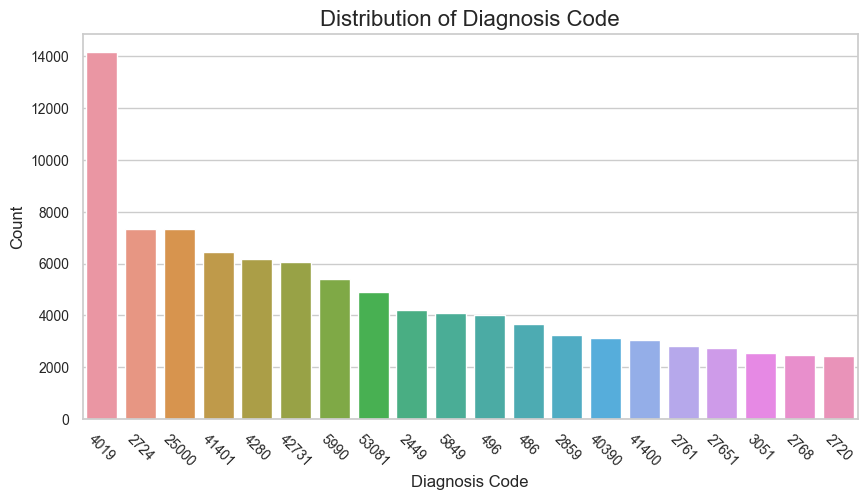

In [236]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(10,5))
ax = sns.countplot(x='DiagnosisCode', data=ClmDiagnosisCode_IP_df, orient ="v", order = ClmDiagnosisCode_IP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code', fontsize=16)
plt.xlabel('Diagnosis Code', size = 12)
plt.ylabel('Count', size = 12)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

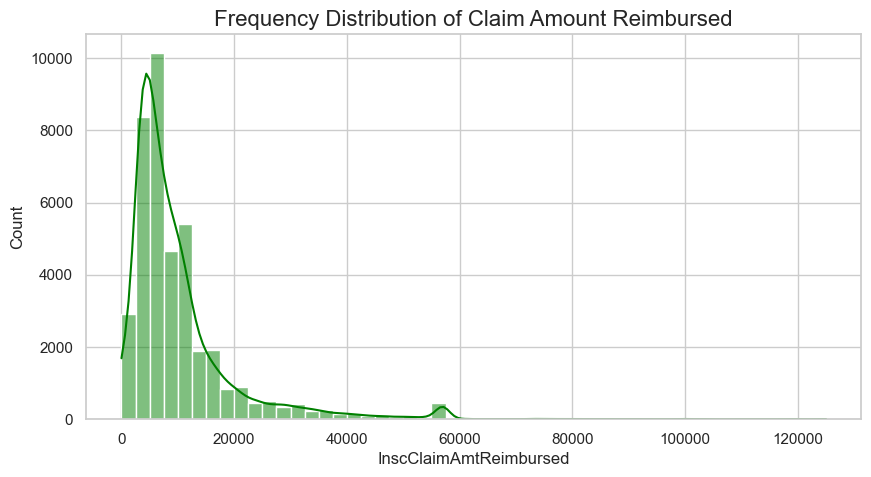

In [237]:
# Plot the distribution for InscClaimAmtReimbursed
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(train_inpatient['InscClaimAmtReimbursed'], kde = True, color ='green', bins = 50)
plt.title('Frequency Distribution of Claim Amount Reimbursed', fontsize=16)
plt.show()

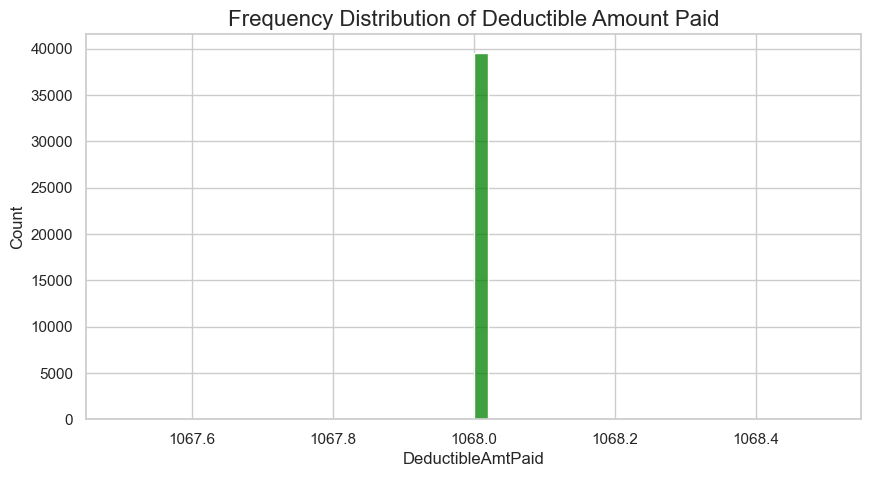

In [238]:
# Plot the distribution for DeductibleAmtPaid
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(train_inpatient['DeductibleAmtPaid'].dropna(), kde = False, color ='green', bins = 50)
plt.title('Frequency Distribution of Deductible Amount Paid', fontsize=16)
plt.show()

### Explore Outpatients Data

In [239]:
train_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [240]:
train_outpatient['ClaimStartDt'] = pd.to_datetime(train_outpatient['ClaimStartDt'],format='%Y-%m-%d')
train_outpatient['ClaimEndDt'] = pd.to_datetime(train_outpatient['ClaimEndDt'],format='%Y-%m-%d')

test_outpatient['ClaimStartDt'] = pd.to_datetime(test_outpatient['ClaimStartDt'],format='%Y-%m-%d')
test_outpatient['ClaimEndDt'] = pd.to_datetime(test_outpatient['ClaimEndDt'],format='%Y-%m-%d')

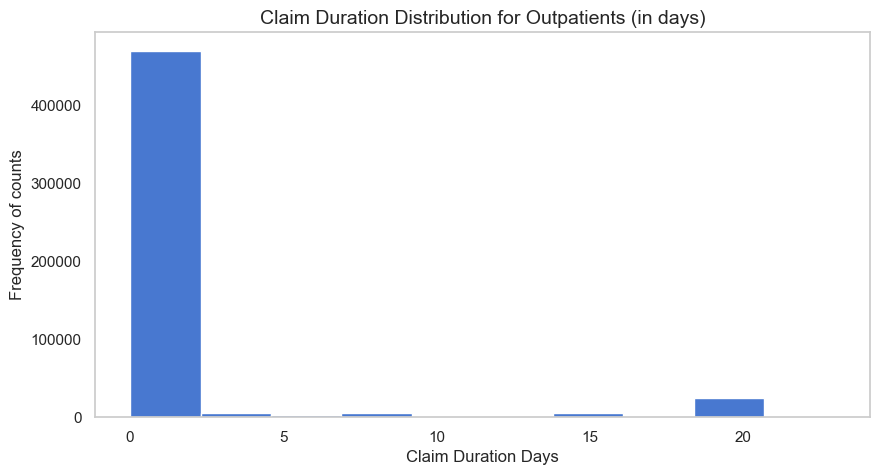

In [241]:
claim_duration_outpatient = (train_outpatient['ClaimEndDt']  - train_outpatient['ClaimStartDt'] ).dt.days
train_outpatient['claim_duration'] = claim_duration_outpatient

claim_duration_outpatient_test = (test_outpatient['ClaimEndDt']  - test_outpatient['ClaimStartDt'] ).dt.days
test_outpatient['claim_duration'] = claim_duration_outpatient_test

plt.figure(figsize = (10,5))
claim_duration_outpatient.plot(kind = 'hist')
plt.xlabel('Claim Duration Days')
plt.ylabel('Frequency of counts')
plt.title('Claim Duration Distribution for Outpatients (in days)', fontsize=14)
plt.grid()
plt.show()

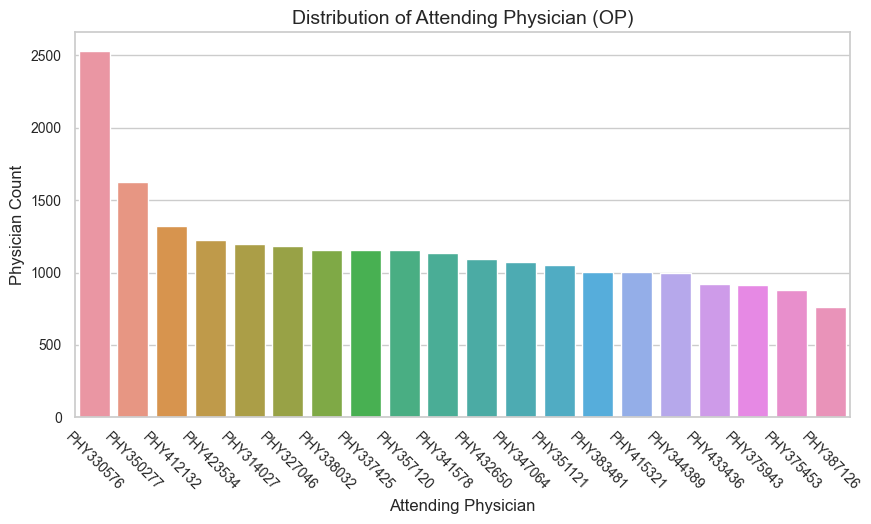

In [242]:
# Top 20 attending physician in terms of patient count
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='AttendingPhysician',y=None, data=train_outpatient, orient ="v", order = train_outpatient['AttendingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of Attending Physician (OP)', fontsize=14)
plt.xlabel('Attending Physician', size = 12)
plt.ylabel('Physician Count', size = 12)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

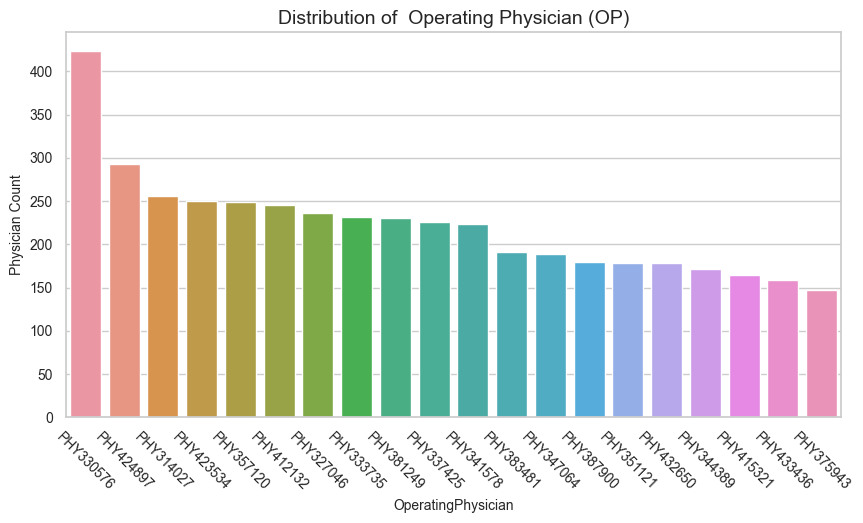

In [243]:
# Plot top 20 Operating Physician in terms of number of patients operated
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='OperatingPhysician',y=None, data=train_outpatient, orient ="v", order = train_outpatient['OperatingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  Operating Physician (OP)', fontsize=14)
plt.xlabel('OperatingPhysician', size = 10)
plt.ylabel('Physician Count', size = 10)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

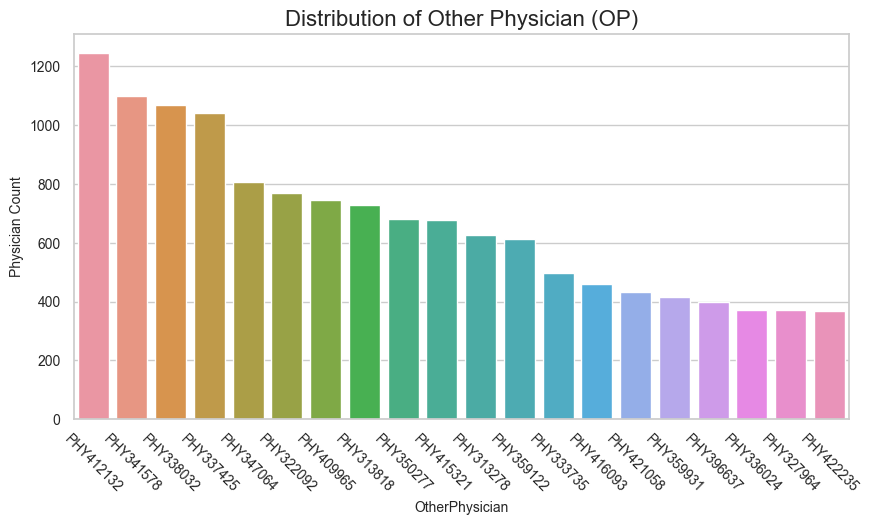

In [244]:
# Plot top 20 Other Physician in terms of number of patients treated
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='OtherPhysician',y=None, data=train_outpatient, orient ="v", order = train_outpatient['OtherPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of Other Physician (OP)', fontsize=16)
plt.xlabel('OtherPhysician', size = 10)
plt.ylabel('Physician Count', size = 10)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

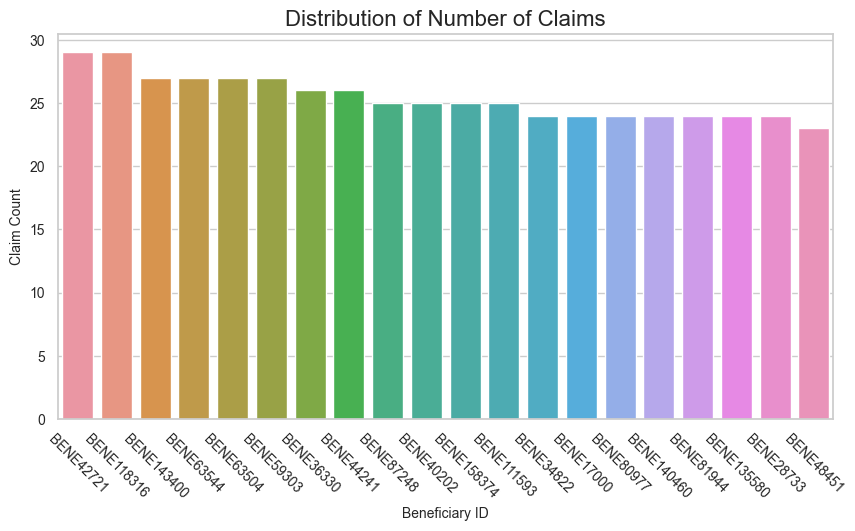

In [245]:
# Distribution of Number of Claims
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='BeneID',y=None, data=train_outpatient, orient ="v", order = train_outpatient['BeneID'].value_counts().head(20).index)
plt.title('Distribution of Number of Claims', fontsize=16)
plt.xlabel('Beneficiary ID', size = 10)
plt.ylabel('Claim Count', size = 10)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

In [246]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_OP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_OP_df['ProcedureCode'] = pd.concat([train_outpatient["ClmProcedureCode_1"],
                                   train_outpatient["ClmProcedureCode_2"],
                                   train_outpatient["ClmProcedureCode_3"],
                                   train_outpatient["ClmProcedureCode_4"],
                                   train_outpatient["ClmProcedureCode_5"],
                                   train_outpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()


ClmProcedureCode_OP_test = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_OP_test['ProcedureCode'] = pd.concat([test_outpatient["ClmProcedureCode_1"],
                                   test_outpatient["ClmProcedureCode_2"],
                                   test_outpatient["ClmProcedureCode_3"],
                                   test_outpatient["ClmProcedureCode_4"],
                                   test_outpatient["ClmProcedureCode_5"],
                                   test_outpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

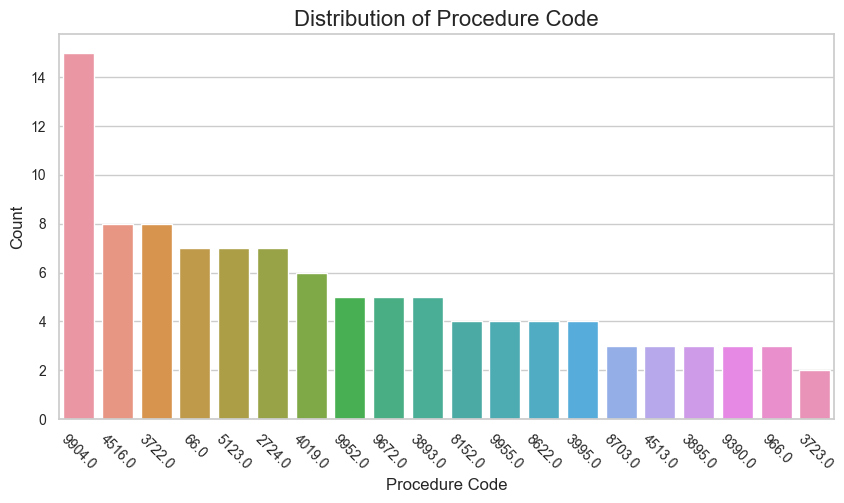

In [247]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_OP_df, orient ="v", order = ClmProcedureCode_OP_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code', fontsize=16)
plt.xlabel('Procedure Code', size = 12)
plt.ylabel('Count', size = 12)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

In [248]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_OP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_OP_df['DiagnosisCode'] = pd.concat([train_outpatient["ClmDiagnosisCode_1"],
                                           train_outpatient["ClmDiagnosisCode_2"],
                                           train_outpatient["ClmDiagnosisCode_3"],
                                           train_outpatient["ClmDiagnosisCode_4"],
                                           train_outpatient["ClmDiagnosisCode_5"],
                                           train_outpatient["ClmDiagnosisCode_6"],
                                           train_outpatient["ClmDiagnosisCode_7"],
                                           train_outpatient["ClmDiagnosisCode_8"],
                                           train_outpatient["ClmDiagnosisCode_9"],
                                           train_outpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

ClmDiagnosisCode_OP_test = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_OP_test['DiagnosisCode'] = pd.concat([test_outpatient["ClmDiagnosisCode_1"],
                                           test_outpatient["ClmDiagnosisCode_2"],
                                           test_outpatient["ClmDiagnosisCode_3"],
                                           test_outpatient["ClmDiagnosisCode_4"],
                                           test_outpatient["ClmDiagnosisCode_5"],
                                           test_outpatient["ClmDiagnosisCode_6"],
                                           test_outpatient["ClmDiagnosisCode_7"],
                                           test_outpatient["ClmDiagnosisCode_8"],
                                           test_outpatient["ClmDiagnosisCode_9"],
                                           test_outpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

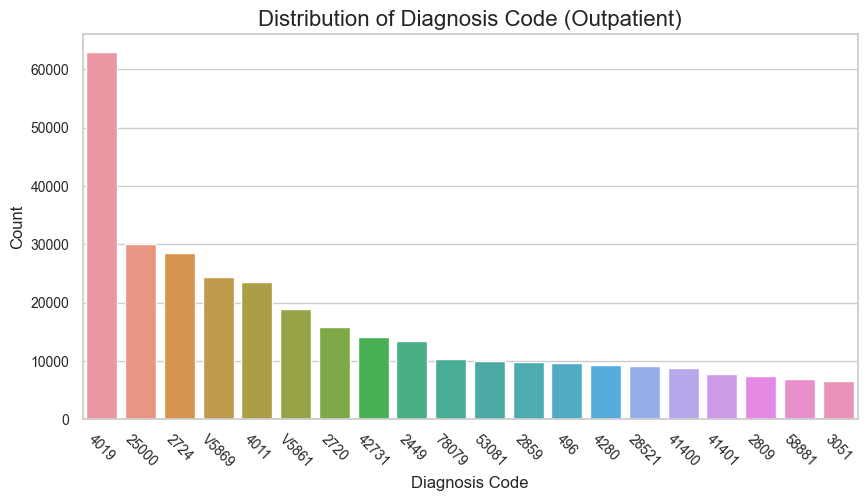

In [249]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_OP_df, orient ="v", order = ClmDiagnosisCode_OP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code (Outpatient)', fontsize=16)
plt.xlabel('Diagnosis Code', size = 12)
plt.ylabel('Count', size = 12)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

### Merging In-Patients and Out-Patients Data

In [250]:

provider = pd.read_csv('./Data/Train-1542865627584.csv')
beneficiary = pd.read_csv('./Data/Train_Beneficiarydata-1542865627584.csv')
inpatient = pd.read_csv('./Data/Train_Inpatientdata-1542865627584.csv')
outpatient = pd.read_csv('./Data/Train_Outpatientdata-1542865627584.csv')

In [251]:
#create a column to identify inpatient or outpatient where inpatient = 1 and outpatient = 0

train_inpatient['inpatient_yn'] =1
train_outpatient['inpatient_yn']=0

test_inpatient['inpatient_yn'] =1
test_outpatient['inpatient_yn']=0

In [252]:
# Merge inpatient and outpatient dataframes based on common columns

common_columns = [ idx for idx in train_outpatient.columns if idx in train_inpatient.columns]
inpatient_outpatient_merge = pd.merge(train_inpatient, train_outpatient, left_on = common_columns, right_on = common_columns,how = 'outer')

inpatient_outpatient_merge_test = pd.merge(test_inpatient, test_outpatient, left_on = common_columns, right_on = common_columns,how = 'outer')

In [253]:
#merge beneficiary data

inpatient_outpat_ben_merge = pd.merge(inpatient_outpatient_merge, train_beneficiary,left_on = 'BeneID',right_on='BeneID', how ='inner')
inpatient_outpat_ben_merge_test = pd.merge(inpatient_outpatient_merge_test, test_beneficiary,left_on = 'BeneID',right_on='BeneID', how ='inner')

In [254]:
#merge provider data

df = pd.merge(inpatient_outpat_ben_merge, train_provider,on='Provider',how='inner')
df_test = pd.merge(inpatient_outpat_ben_merge_test, test_provider,on='Provider',how='inner')

In [255]:
# Concat all the claim precedurecodes in a single dataframe
df_fraud = df[df.PotentialFraud == 'Yes']
ClmProcedureCodeFraud_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCodeFraud_df['ProcedureCode'] = pd.concat([df_fraud["ClmProcedureCode_1"],
                                   df_fraud["ClmProcedureCode_2"],
                                   df_fraud["ClmProcedureCode_3"],
                                   df_fraud["ClmProcedureCode_4"],
                                   df_fraud["ClmProcedureCode_5"],
                                   df_fraud["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

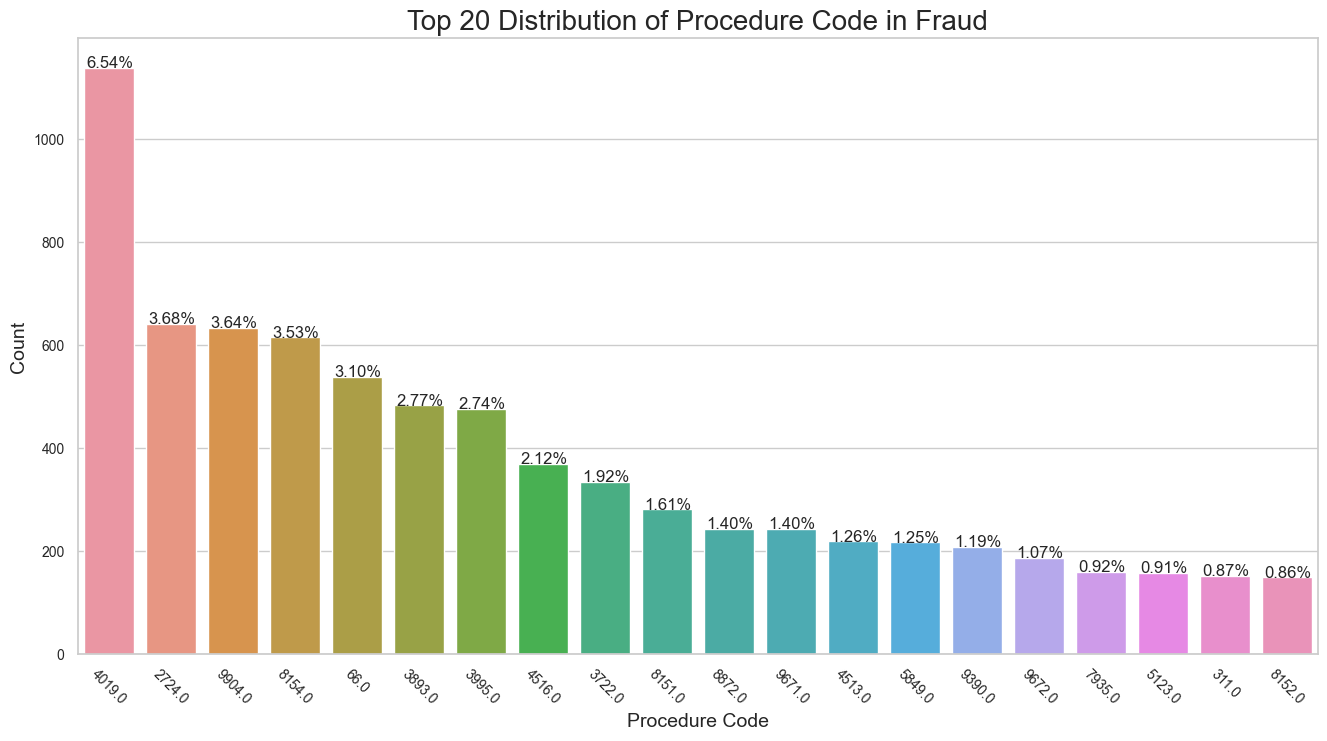

In [256]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCodeFraud_df, orient ="v", order = ClmProcedureCodeFraud_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Top 20 Distribution of Procedure Code in Fraud', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCodeFraud_df['ProcedureCode'], 0.02, 0.01, 12)

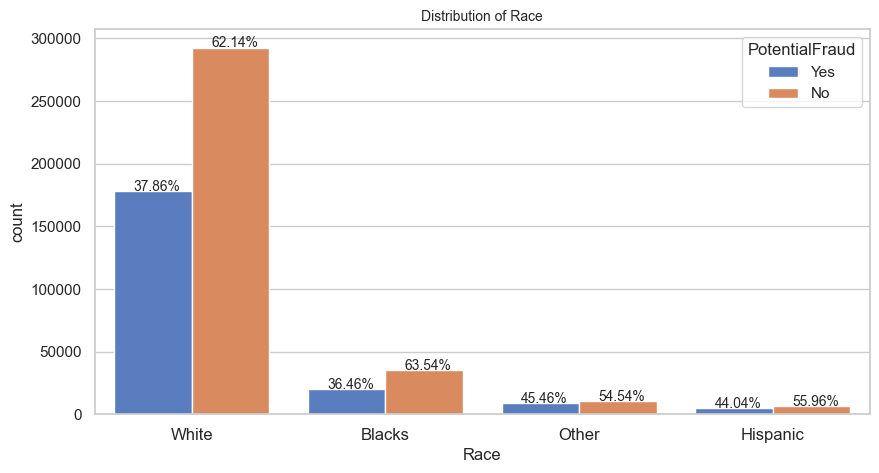

In [257]:
# Distribution of race in Overall data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Race',y=None, data=df, hue="PotentialFraud", orient ="v",hue_order=['Yes','No'], order = df['Race'].value_counts().index)
plt.xticks(labels = ['White','Blacks','Other','Hispanic'],ticks=[0,1,2,3],size = 12)
plt.title('Distribution of Race', size = 10)
percentage_with_hue(ax, df.Race, 4,2,-0.1,200, 10)

In [258]:
# Concat all the fraudlent claim DiagnosisCodes in a single dataframe
ClmDiagnosisCodeFraud_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCodeFraud_df['DiagnosisCode'] = pd.concat([df_fraud["ClmDiagnosisCode_1"],
                                           df_fraud["ClmDiagnosisCode_2"],
                                           df_fraud["ClmDiagnosisCode_3"],
                                           df_fraud["ClmDiagnosisCode_4"],
                                           df_fraud["ClmDiagnosisCode_5"],
                                           df_fraud["ClmDiagnosisCode_6"],
                                           df_fraud["ClmDiagnosisCode_7"],
                                           df_fraud["ClmDiagnosisCode_8"],
                                           df_fraud["ClmDiagnosisCode_9"],
                                           df_fraud["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

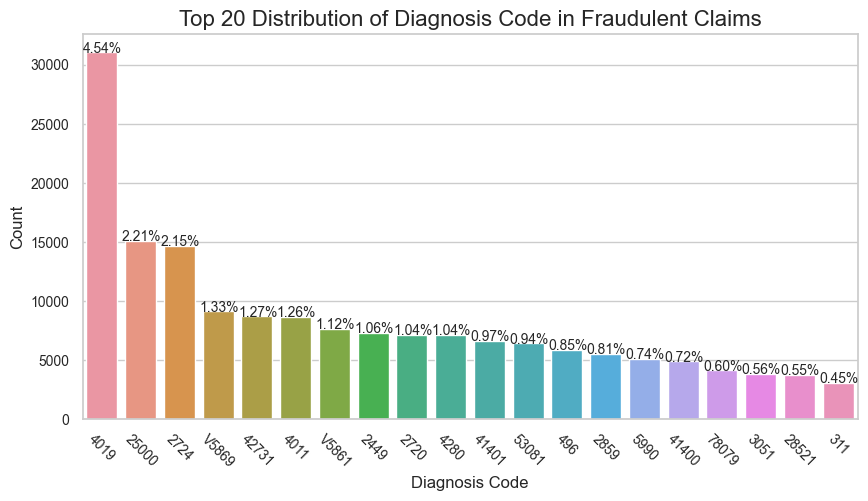

In [259]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCodeFraud_df, orient ="v", order = ClmDiagnosisCodeFraud_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Top 20 Distribution of Diagnosis Code in Fraudulent Claims', fontsize=16)
plt.xlabel('Diagnosis Code', size = 12)
plt.ylabel('Count', size = 12)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCodeFraud_df['DiagnosisCode'], 0.02, 0.01, 10)

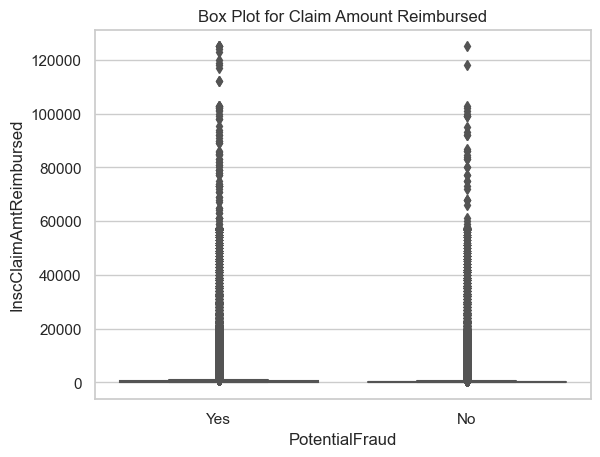

In [260]:
#Box Plot for InscClaimAmtReimbursed
# px.box(df, y = 'InscClaimAmtReimbursed', x = 'PotentialFraud', labels = {'InscClaimAmtReimbursed': 'Amount'}, title= 'Box Plot for Claim Amount Reimbursed')

sns.boxplot(df, x = 'PotentialFraud', y = 'InscClaimAmtReimbursed')
plt.title('Box Plot for Claim Amount Reimbursed')
plt.show()


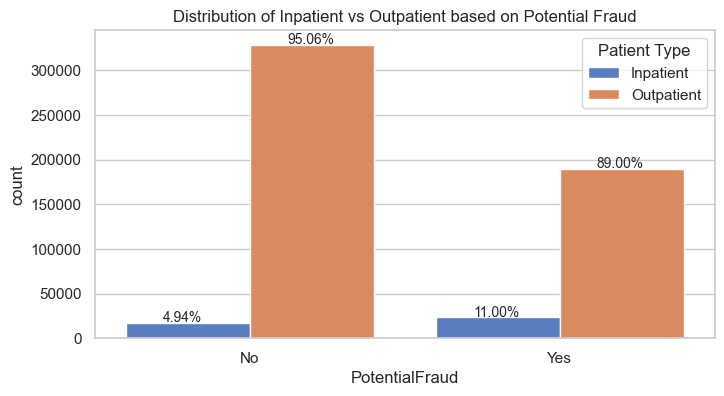

In [261]:
plt.figure(figsize=(8,4))
temp = df.copy()
temp['inpatient_yn'] = temp['inpatient_yn'].map({0: 'Outpatient', 1: 'Inpatient'})
ax = sns.countplot(x='PotentialFraud',data=temp, hue = 'inpatient_yn', order = temp['PotentialFraud'].value_counts().index)
plt.title('Distribution of Inpatient vs Outpatient based on Potential Fraud')
plt.legend(title = 'Patient Type')
percentage_with_hue(ax, temp['PotentialFraud'], 2,2,-0.08,1000, 10)

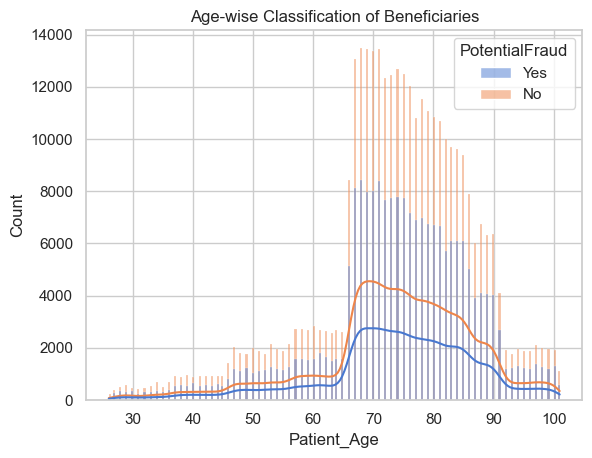

In [262]:

sns.histplot(df, x = 'Patient_Age', hue = 'PotentialFraud', kde = True)
plt.title('Age-wise Classification of Beneficiaries')
plt.show()

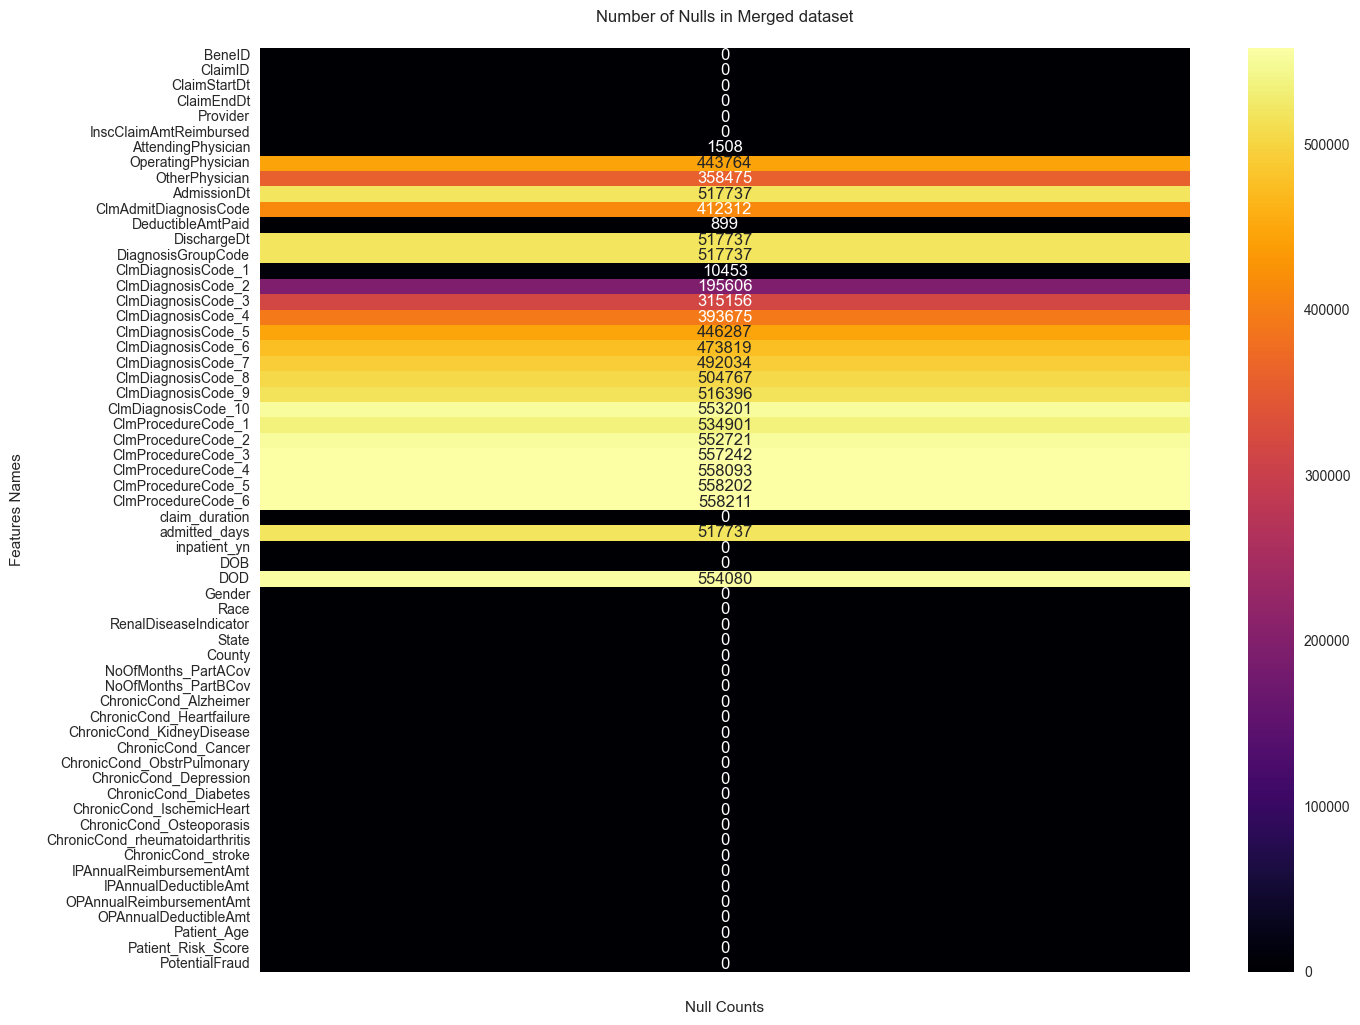

In [263]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,12))
    fig = sns.heatmap(pd.DataFrame(df.isnull().sum()), annot=True, fmt=".7g", cmap='inferno', cbar=True)
    # Providing the labels and title to the graph
    plt.xticks(labels=[" "], ticks=[0])
    plt.xlabel("Null Counts")
    plt.ylabel("Features Names\n")
    plt.minorticks_on()
    plt.title("Number of Nulls in Merged dataset\n")
    plt.show()

Merged Dataset

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 60 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   AdmissionDt                      40474 non-null   datetime64[ns]
 10  ClmAdmitDiagnosisCode            145899 non-

### Feature Engineering

In [265]:
def feature_engineering(df):

    df['RenalDiseaseIndicator'] = df['RenalDiseaseIndicator'].apply(lambda x: 1 if x=='Y' else 0)
    for chronicCol in [col for col in list(df.columns) if 'Chronic' in col]:
        df[chronicCol].replace(to_replace=2, value=0, inplace=True)
    
    df.rename(columns={'County': 'Country'}, inplace=True)
    df['DeductibleAmtPaid'].fillna(value=0, inplace=True)
    
    df.dropna(axis=1, how='all', inplace=True)
    
    data2 = df.copy(deep=True)
    columnsToRemove = ['ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']
    df.drop(columns=columnsToRemove, inplace=True)
    
    
    df['IsDead'] = df['DOD'].apply(lambda x: 1 if pd.notnull(x) else 0)
    df['IsDead']
    
    colDate = [col for col in df.columns if ('Dt' in col or 'DOB' in col or 'DOD' in col)]
    
        # Convert these columns to DateTime Format
    
    df['ClaimSettlementDelay'] = (df['ClaimEndDt'] - df['ClaimStartDt']).dt.days
    
    # Generate new Feature 'TreatmentDuration' (DischargeDt - AdmissionDt)
    df['TreatmentDuration'] = (df['DischargeDt'] - df['AdmissionDt']).dt.days
    df['TreatmentDuration'].fillna(0, inplace=True)
    
    
    df['TreatmentDuration'] = df['TreatmentDuration'].apply(int)
    maxDate = max(df['ClaimEndDt'].max(), df['DischargeDt'].max())
    
    df.drop(columns=colDate, inplace=True)
    
    df['Gender'].replace(to_replace=2, value=0, inplace=True)
    
    
    df['TotalClaimAmount'] = df['InscClaimAmtReimbursed'] + df['DeductibleAmtPaid']
    # Total Inpatient Amount = Inpatient Annual Amount reimbursed + Inpatient Annual Deductible Amount
    df['IPTotalAmount'] = df['IPAnnualReimbursementAmt'] + df['IPAnnualDeductibleAmt']
    
    # Total Outpatient Amount = Outpatient Annual Amount reimbursed + Outpatient Annual Deductible Amount
    df['OPTotalAmount'] = df['OPAnnualReimbursementAmt'] + df['OPAnnualDeductibleAmt']
    
    colAmt = [col for col in df.columns if 'Amt' in col]
    df.drop(columns=colAmt, inplace=True)
    
    
    df.drop(columns=['BeneID', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], inplace=True)
    # Remove the above set of columns from the dataframe.
    
    
    colPhys = [col for col in df.columns if 'Physician' in col]
    
    # Prepare the feature 'UniquePhysCount'
    df['UniquePhysCount'] = df[colPhys].apply(lambda x: len(set([phys for phys in x if not pd.isnull(phys)])), axis=1)
    
    # Prepare the feature 'PhysRoleCount'
    df['PhysRoleCount'] = df[colPhys].apply(lambda x: len([phys for phys in x if not pd.isnull(phys)]), axis=1)
    
    # Prepare the feature 'IsSamePhysMultiRole1'
    df['IsSamePhysMultiRole1'] = df[['UniquePhysCount','PhysRoleCount']] \
    .apply(lambda x: 1 if x['UniquePhysCount'] == 1 and x['PhysRoleCount'] > 1 else 0, axis=1)
    
    # Prepare the feature 'IsSamePhysMultiRole2'
    df['IsSamePhysMultiRole2'] = df[['UniquePhysCount','PhysRoleCount']] \
    .apply(lambda x: 1 if x['UniquePhysCount'] == 2 and x['PhysRoleCount'] > 2 else 0, axis=1)
    
    df.drop(columns=['AttendingPhysician','OperatingPhysician','OtherPhysician'], inplace=True)
    
    
    colDiagCode = [col for col in df.columns if 'ClmDiagnosisCode' in col]
    for diagCode in colDiagCode:
            df[diagCode] = df[diagCode].apply(lambda x: 1 if not pd.isnull(x) else 0)
    
    colDiagCode1 = [col for col in df.columns if 'Procedure' in col]
    for diagCode in colDiagCode1:
            df[diagCode] = df[diagCode].apply(lambda x: 1 if not pd.isnull(x) else 0)
    
    for code in ['ClmAdmitDiagnosisCode', 'DiagnosisGroupCode']:
          df[code] = df[code].apply(lambda x: 1 if not pd.isnull(x) else 0)
    
    df.drop(columns=['DiagnosisGroupCode', 'ClmProcedureCode_1', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                           'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8'],
                  inplace=True)
    
    df.drop(columns = ['claim_duration', 'admitted_days'], axis = 1, inplace=True)
    return df

In [266]:
df = feature_engineering(df)
df['PotentialFraud'].replace(to_replace=['Yes', 'No'], value=[1, 0], inplace=True)

df_test = feature_engineering(df_test)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 38 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ClaimID                          558211 non-null  object 
 1   Provider                         558211 non-null  object 
 2   ClmAdmitDiagnosisCode            558211 non-null  int64  
 3   ClmDiagnosisCode_1               558211 non-null  int64  
 4   ClmDiagnosisCode_2               558211 non-null  int64  
 5   ClmDiagnosisCode_9               558211 non-null  int64  
 6   ClmDiagnosisCode_10              558211 non-null  int64  
 7   ClmProcedureCode_2               558211 non-null  int64  
 8   inpatient_yn                     558211 non-null  int64  
 9   Gender                           558211 non-null  int64  
 10  Race                             558211 non-null  int64  
 11  RenalDiseaseIndicator            558211 non-null  int64  
 12  St

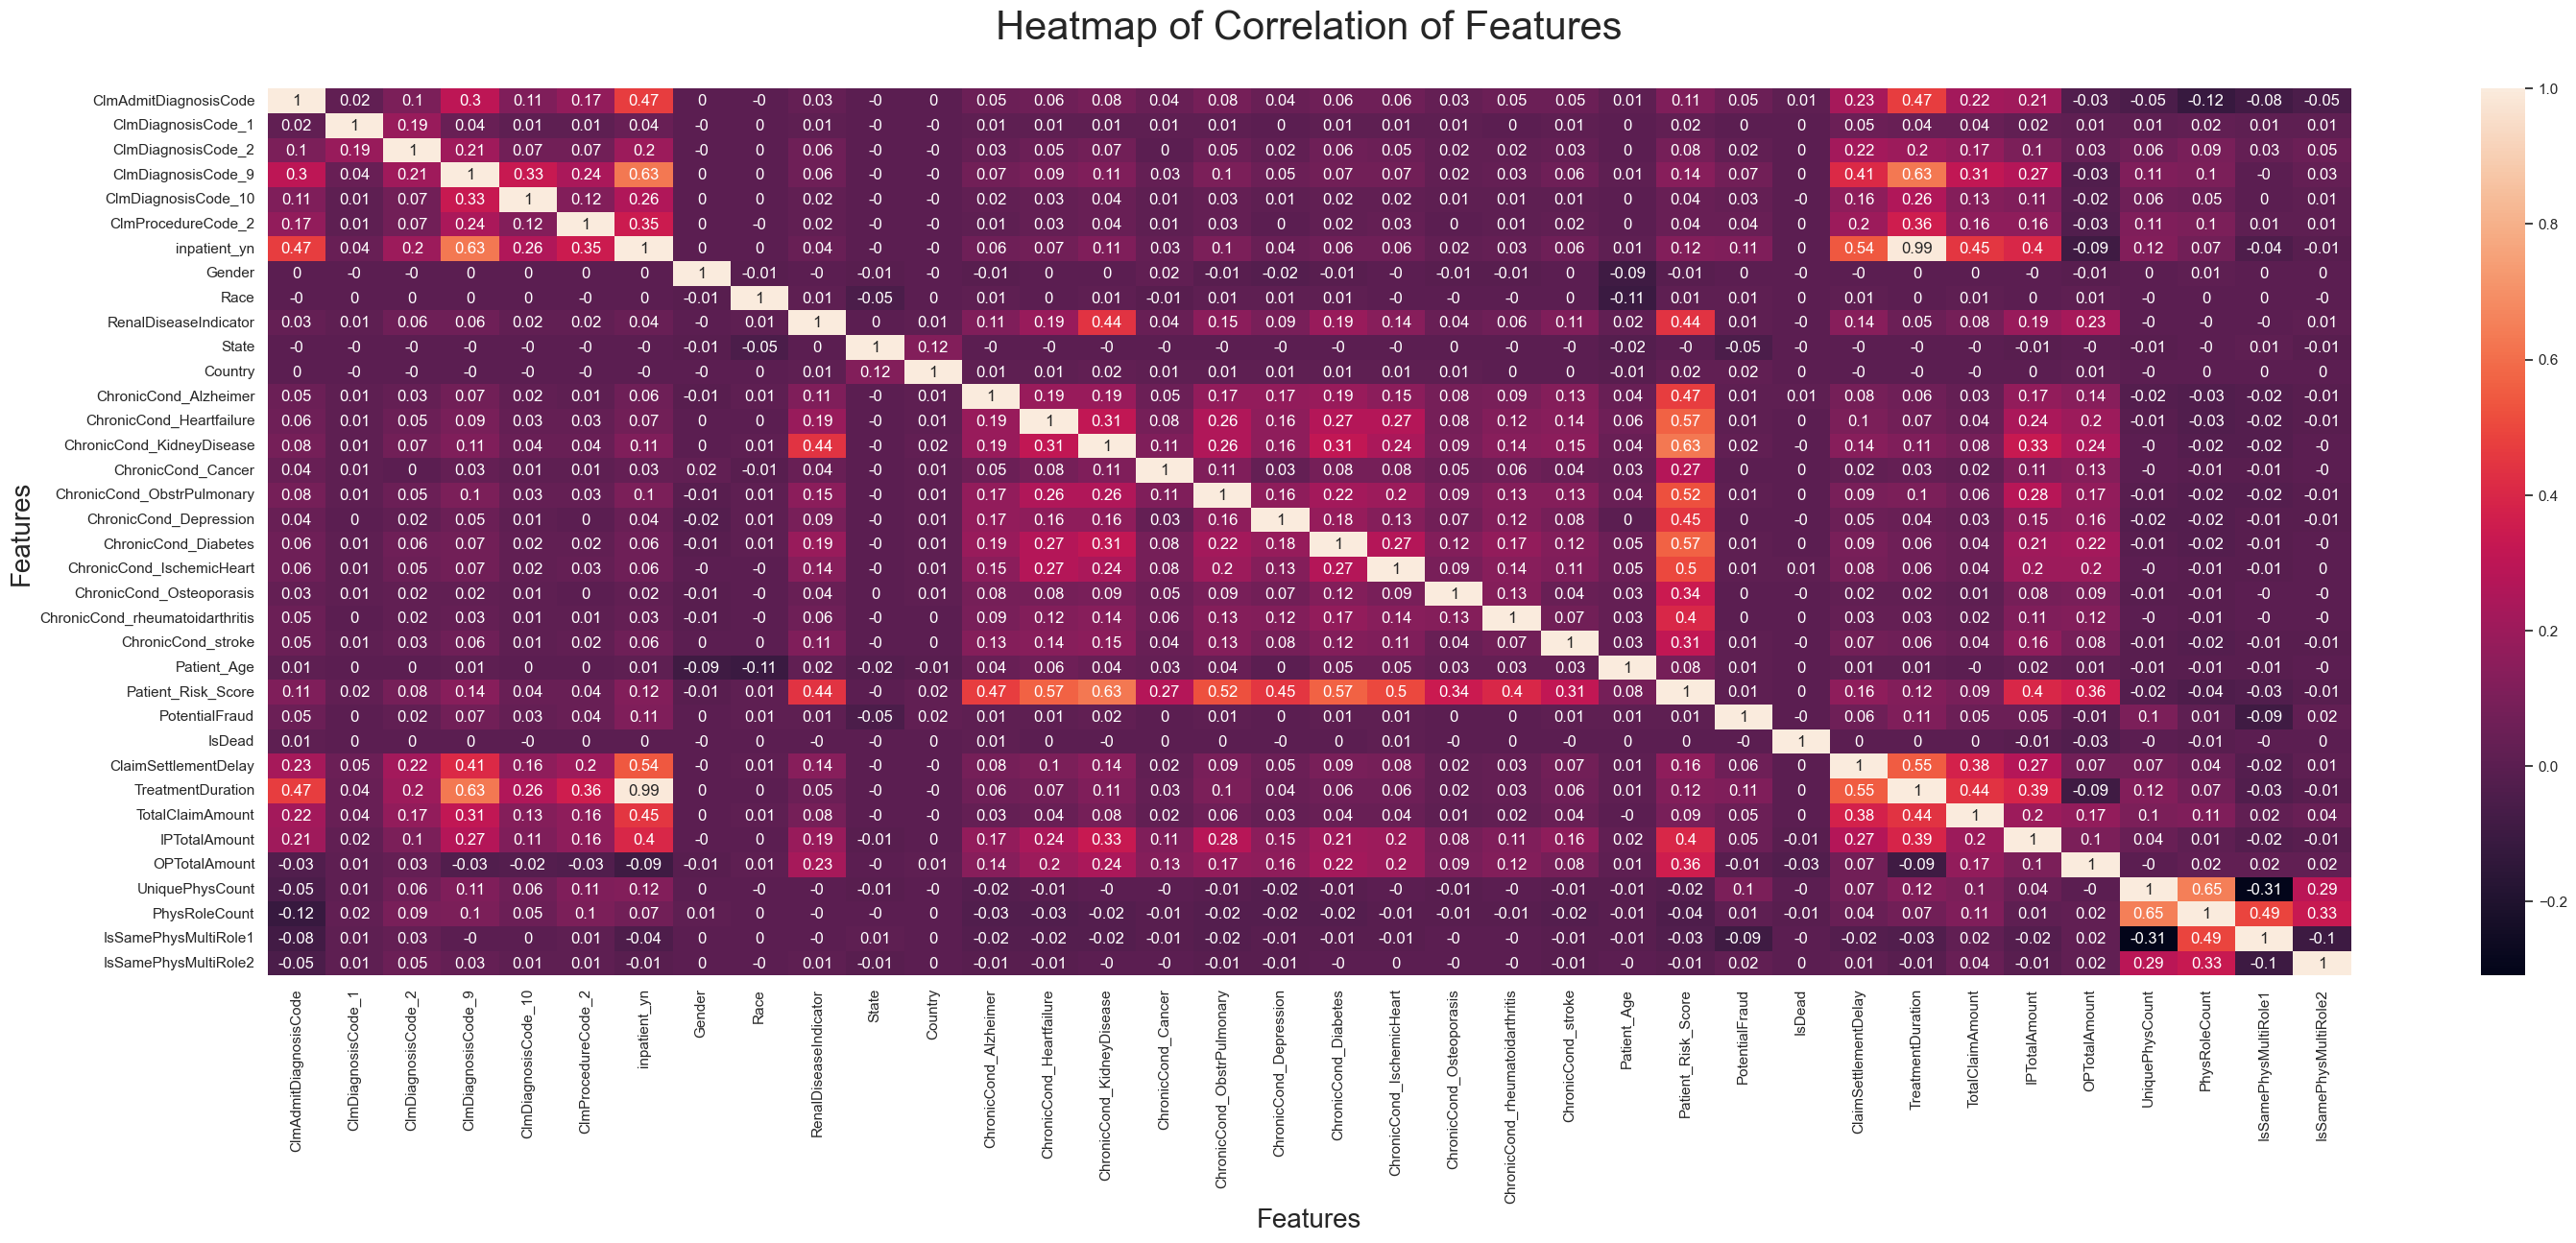

In [268]:

numeric_columns = df.select_dtypes(include=np.number).columns

corr = df[numeric_columns].corr(method='spearman')
corr = np.round(corr, 2)
plt.figure(figsize = (35,12))
sns.heatmap(corr, annot=True)
plt.xlabel('Features', size=20)
plt.ylabel('Features', size=20)

plt.title('Heatmap of Correlation of Features\n', fontsize=30)
plt.show()

### Exploring over all Data

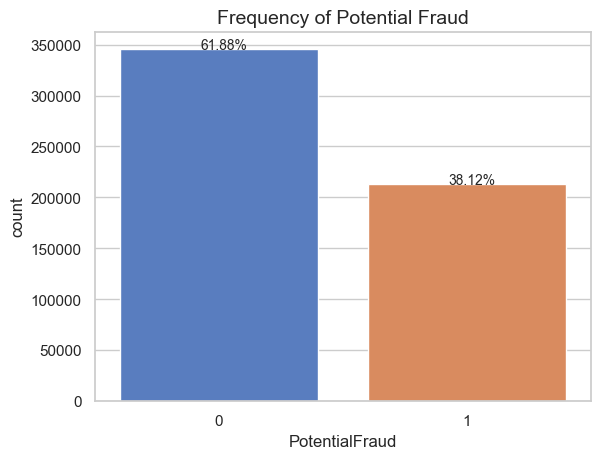

In [269]:
# Distribution of fraud by claims
ax = sns.countplot(x = df['PotentialFraud'])
plt.title('Frequency of Potential Fraud', fontsize=14)
percentage_without_hue(ax, df['PotentialFraud'], 0.02, 0.01, 10)
plt.show()

In [278]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [294]:
X,Y = df.drop(columns=['PotentialFraud', 'ClaimID', 'Provider'], axis=1), df['PotentialFraud']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [295]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.99)
pca_df_train = pca.fit_transform(x_train)
pca_df_test = pca.fit_transform(x_test)


In [296]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [297]:
log_ypred = log_reg.predict(x_test)

In [298]:
log_cm = confusion_matrix(y_test, log_ypred)
log_cm

array([[67850,  1427],
       [40406,  1960]], dtype=int64)

In [299]:
print(classification_report(y_test, log_ypred))

              precision    recall  f1-score   support

           0       0.63      0.98      0.76     69277
           1       0.58      0.05      0.09     42366

    accuracy                           0.63    111643
   macro avg       0.60      0.51      0.43    111643
weighted avg       0.61      0.63      0.51    111643



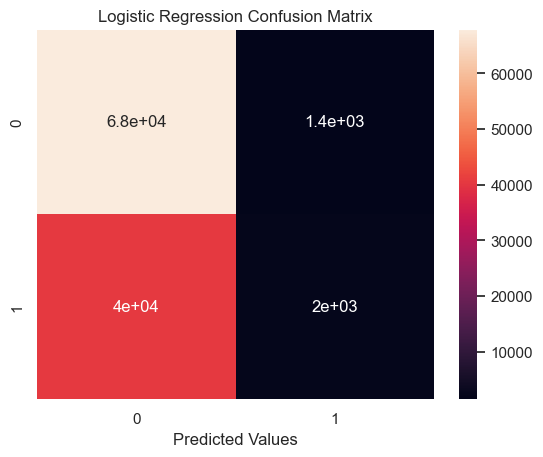

In [300]:
sns.heatmap(log_cm, annot=True)
plt.xlabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [301]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [302]:
rfc_ypred = rfc.predict(x_test)

In [303]:
rfc_cm = confusion_matrix(y_test, rfc_ypred)
rfc_cm

array([[58126, 11151],
       [20690, 21676]], dtype=int64)

In [304]:
print(classification_report(y_test, rfc_ypred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.78     69277
           1       0.66      0.51      0.58     42366

    accuracy                           0.71    111643
   macro avg       0.70      0.68      0.68    111643
weighted avg       0.71      0.71      0.71    111643



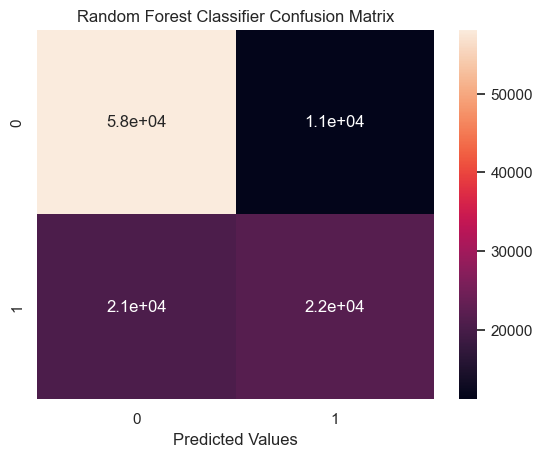

In [305]:
sns.heatmap(rfc_cm, annot=True)
plt.xlabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()